# AirBnb New York Price Prediction 

## Introduction

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AirBnb is a very popular website which is an alternative for the hotels and guestrooms around the world. People (hosts) can rent their own places (listings) in a lot of parts of the world with just a few clicks on their devices. The prices for the rent are very reasonable and often hosts offer rental at competitive prices to official hotels and guesthouses. Simplicity and wide range of listings has transformed Airbnb into a multi-billion company and made the site translated into 53 languages and introduced in 191 countries!

I decided to explore AirBnb phenomena more deeply and tried to build a model which can predict listing's price based on listings data located in New York obtained from http://insideairbnb.com/.

Therefore, I got 2 datasets:

+ *listings_full.csv* 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Listings data from NYC compiled on 8th December 2019 which is going to be a train data for the project; it contains information about listings from 2008 until December 2019


+ *listings_full_02_2020.csv* 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Listings data from NYC compiled on 12th February 2020, which I am going to make test data out of it; it contains information about listings from 2008 to February 2020


I had newer data available but I decided to get the data from the time before COVID-19 pandemic which affected the global economy including tourism and therefore rental prices.

The project consists of 3 main parts:

 1. **Data Preprocessing** - data exploration, modifying the train set, preparing data for a modelling with usage of pipelines and transformers 
 2. **Data Modelling** - taking the transformed train set through different solutions to get the best possible                          model 
 3. **Model Evaluation** - generating a test set out from the second dataset, transforming it with pipeline prepared for the train set and testing the chosen model on the test set
                           
I have also included extra Python file *Classes_and_functions.py* where I put all transformers and functions I created throughout the project so that the whole process will be more readable. 

I started with importing all necessary libraries and files:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import yaml

from joblib import dump, load
from sklearn.pipeline import Pipeline

from Classes_And_Functions import *


In [2]:
warnings.filterwarnings('ignore')

### Train data loading 

In [3]:
df = pd.read_csv('data/listings_full.csv')

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.67
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.60
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,3.52


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50599 entries, 0 to 50598
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 40.9+ MB


In [6]:
for column in df.columns:
    print(column)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

### Printing all data on first listing

The train dataset consists of 50599 listings with 106 features (including price variable I want to predict). In order to get more insight on the data I have, I have printed the data of the first listing.  

In [7]:
first_listing = df.loc[0]

In [8]:
for i, c in zip(first_listing, df.columns):
    print(f'{c}:\n {i}\n')

id:
 2595

listing_url:
 https://www.airbnb.com/rooms/2595

scrape_id:
 20191204162729

last_scraped:
 2019-12-07

name:
 Skylit Midtown Castle

summary:
 Beautiful, spacious skylit studio in the heart of Midtown, Manhattan.  STUNNING SKYLIT STUDIO / 1 BED + SINGLE / FULL BATH / FULL KITCHEN / FIREPLACE / CENTRALLY LOCATED / WiFi + APPLE TV / SHEETS + TOWELS

space:
 - Spacious (500+ft²), immaculate and nicely furnished & designed studio. - Tuck yourself into the ultra comfortable bed under the skylight. Fall in love with a myriad of bright lights in the city night sky.  - Single-sized bed/convertible floor mattress with luxury bedding (available upon request). - Gorgeous pyramid skylight with amazing diffused natural light, stunning architectural details, soaring high vaulted ceilings, exposed brick, wood burning fireplace, floor seating area with natural zafu cushions, modern style mixed with eclectic art & antique treasures, large full bath, newly renovated kitchen, air conditioning

### Columns filtering 1

Based on the first listing data, I had seen a lot of columns which I surely would not need for the analysis and therefore - modelling. Before more thorough features analysis I have identified 'garbage' columns:

#### Null columns
Firstly, I have obtained information about number of null values in each column.

In [9]:
nulls = df.isnull().sum().sort_values(ascending=False)
nulls[nulls > 0]

thumbnail_url                  50599
medium_url                     50599
xl_picture_url                 50599
host_acceptance_rate           50599
jurisdiction_names             50583
license                        50577
square_feet                    50213
monthly_price                  45683
weekly_price                   44945
notes                          29976
access                         23543
interaction                    20526
host_about                     20290
house_rules                    19520
host_response_time             17658
host_response_rate             17658
neighborhood_overview          17471
security_deposit               17470
transit                        17416
space                          14135
review_scores_location         11218
review_scores_value            11217
review_scores_checkin          11214
review_scores_accuracy         11198
review_scores_communication    11195
review_scores_cleanliness      11184
review_scores_rating           11162
c

Based on the *nulls* Series I have decided to get rid of the columns which have more than 40 000 empty values.

These columns are:
+ **'thumbnail_url' , 'medium_url' , 'xl_picture_url', 'host_acceptance_rate', 'jurisdiction_names', 'license', 'square_feet'** : empty or nearly empty columns 
+ **'monthly_price', 'weekly_price'** : these columns have significantly less empty values than the columns from the first group but they only contain information whether hosts offer some discounts if guest decides to stay in his/her listing for longer period of time. These columns contain unneeded information since I wanted to predict daily rental price of a listing.
 
 

Since I was going to create a preprocessing pipeline for the datasets I had created a list of unnecessary columns and kept track of it on every step of this part the project 

In [10]:
columns_to_remove = ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'jurisdiction_names', 'license', 'square_feet',                   
'monthly_price', 'weekly_price']  
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price']

#### One-valued columns

I also did not need columns which assign same value to each listing as they do not give any additional information so I checked whether my train dataset contains such features

In [11]:
one_valued_columns = {col: [df[col].nunique(), df[col].isnull().sum()]  for col in df.columns if df[col].nunique() == 1}

for col, results in one_valued_columns.items():
      print(f'{col} has {results[0]} unique values and {results[1]} nulls.\n' )

scrape_id has 1 unique values and 0 nulls.

experiences_offered has 1 unique values and 0 nulls.

country_code has 1 unique values and 0 nulls.

country has 1 unique values and 0 nulls.

has_availability has 1 unique values and 0 nulls.

requires_license has 1 unique values and 0 nulls.

is_business_travel_ready has 1 unique values and 0 nulls.



It turned out the dataset contains 6 one-valued columns but I also wanted to ensure that these columns do not have null values. There may be a case where one column is e.g. a binary feature (1-0 column) and all filled values are 1 whereas all null values should be 0. However, they were not filled in for some reason and needed to be put manually.

In this case, all 6 one-valued columns do not contain any empty values so it clearly shows that these columns have one value assigned to each listing. Therefore, they can be removed from the dataset. I have added them to *columns_to_remove* list I have created before

In [12]:
irrelevant_columns = list(one_valued_columns.keys())
irrelevant_columns

['scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready']

In [13]:
columns_to_remove.extend(irrelevant_columns)

### Target variable exploration

After first stage of column filtering I decided to get into *Price* feature of the dataset.
Before analyzing this feature I had to make some modifications to this column as it was Object type. Moreover, each price contained dollar sign and commas if price was higher or equal to 1000.  

In [14]:
df['price']

0        $225.00
1         $89.00
2        $200.00
3         $60.00
4         $79.00
          ...   
50594    $200.00
50595    $150.00
50596    $225.00
50597     $70.00
50598    $100.00
Name: price, Length: 50599, dtype: object

In [15]:
df['price'].unique()

array(['$225.00', '$89.00', '$200.00', '$60.00', '$79.00', '$150.00',
       '$85.00', '$120.00', '$140.00', '$199.00', '$99.00', '$190.00',
       '$299.00', '$115.00', '$80.00', '$32.00', '$44.00', '$180.00',
       '$50.00', '$52.00', '$55.00', '$70.00', '$98.00', '$40.00',
       '$68.00', '$135.00', '$130.00', '$110.00', '$151.00', '$228.00',
       '$149.00', '$69.00', '$49.00', '$90.00', '$375.00', '$250.00',
       '$45.00', '$260.00', '$51.00', '$65.00', '$105.00', '$170.00',
       '$95.00', '$145.00', '$285.00', '$2,000.00', '$111.00', '$125.00',
       '$175.00', '$500.00', '$101.00', '$220.00', '$100.00', '$59.00',
       '$350.00', '$325.00', '$400.00', '$75.00', '$185.00', '$77.00',
       '$76.00', '$160.00', '$195.00', '$219.00', '$475.00', '$119.00',
       '$450.00', '$165.00', '$275.00', '$385.00', '$123.00', '$265.00',
       '$121.00', '$71.00', '$64.00', '$159.00', '$189.00', '$239.00',
       '$305.00', '$155.00', '$92.00', '$38.00', '$129.00', '$37.00',
       

I have created a *remove_nonnumeric_chars* function to get rid of non-numeric chars in prices.
Lastly, I converted the column to float and got basic information about the column including its distribution:

In [16]:
df['price'] = df['price'].apply(lambda x: remove_nonnumeric_chars(x))
df['price'] = df['price'].astype('float')

In [17]:
df[df['price'] == 0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
21519,18750597,https://www.airbnb.com/rooms/18750597,20191204162729,2019-12-05,"Huge Brooklyn Brownstone Living, Close to it all.","Great, Brooklyn, Brownstown. Large and bright ...","Work groups, women retreat, think tank, family...","Great, Brooklyn, Brownstown. Large and bright ...",none,The neighborhood is friendly and lively. There...,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,0.04
23802,20523843,https://www.airbnb.com/rooms/20523843,20191204162729,2019-12-05,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",We're located in a beautiful newly renovated t...,"Your room has a desk, a bunk bed, a futon couc...",We're located in a beautiful newly renovated t...,none,"There are many nice venues, bars, coffee shops...",...,f,f,flexible,f,f,6,0,6,0,0.58
23911,20608117,https://www.airbnb.com/rooms/20608117,20191204162729,2019-12-05,"Sunny, Quiet Room in Greenpoint",Queen size bed in bedroom overlooking the back...,Simple decor with mainly custom and vintage fu...,Queen size bed in bedroom overlooking the back...,none,Maybe I'm biased but Greenpoint is the best ne...,...,f,f,moderate,f,f,2,0,2,0,0.43
23936,20624541,https://www.airbnb.com/rooms/20624541,20191204162729,2019-12-05,Modern apartment in the heart of Williamsburg,Minimalist loft apartment with a stylish balco...,1 Bedroom apartment located between Williamsbu...,Minimalist loft apartment with a stylish balco...,none,Want to experience New York but Brooklyn style...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.20
23953,20639628,https://www.airbnb.com/rooms/20639628,20191204162729,2019-12-06,Spacious comfortable master bedroom with nice ...,"Clean, newly renovated brownstone townhouse in...",NaN,"Clean, newly renovated brownstone townhouse in...",none,NaN,...,t,f,strict_14_with_grace_period,f,f,6,0,6,0,4.45
23954,20639792,https://www.airbnb.com/rooms/20639792,20191204162729,2019-12-06,Contemporary bedroom in brownstone with nice view,"Clean, newly renovated brownstone townhouse in...",NaN,"Clean, newly renovated brownstone townhouse in...",none,NaN,...,t,f,strict_14_with_grace_period,f,f,6,0,6,0,4.26
23955,20639914,https://www.airbnb.com/rooms/20639914,20191204162729,2019-12-06,Cozy yet spacious private brownstone bedroom,"Clean, newly renovated brownstone townhouse in...",NaN,"Clean, newly renovated brownstone townhouse in...",none,NaN,...,t,f,strict_14_with_grace_period,f,f,6,0,6,0,4.66
24371,20933849,https://www.airbnb.com/rooms/20933849,20191204162729,2019-12-05,the best you can find,NaN,NaN,NaN,none,NaN,...,f,f,flexible,f,f,1,1,0,0,NaN
24908,21291569,https://www.airbnb.com/rooms/21291569,20191204162729,2019-12-05,Coliving in Brooklyn! Modern design / Shared room,"Newly renovated, modern, spacious Outpost Club...",The modern East Bushwick House is designed for...,"Newly renovated, modern, spacious Outpost Club...",none,Bushwick is a modern neighborhood in the north...,...,f,f,strict_14_with_grace_period,f,f,6,0,2,4,0.09
24932,21304320,https://www.airbnb.com/rooms/21304320,20191204162729,2019-12-06,Best Coliving space ever! Shared room.,The Outpost Club Co-Living residences are a be...,The modern East Bushwick House is designed for...,The Outpost Club Co-Living residences are a be...,none,Bushwick is a working-class neighborhood in th...,...,f,f,strict_14_with_grace_period,f,f,6,0,2,4,0.25


In [18]:
df['price'].describe()

count    50599.000000
mean       158.171782
std        348.089562
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

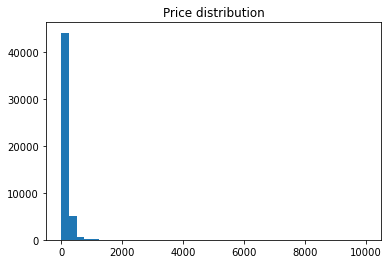

In [19]:
plt.hist(df['price'], bins=40)
plt.title('Price distribution')
plt.show()

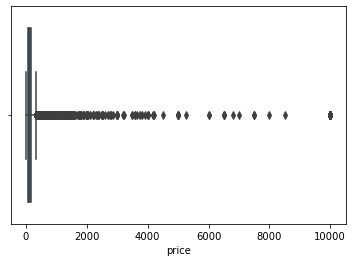

In [20]:
sns.boxplot(df['price'])
plt.show()

The *Price* feature turned out to be right-skewed, containing lots of outliers and 16 "0" values. 

Since target variable in regression models should follow the Gaussian distribution I have decided to add an extra feature to the dataset - *log_price*.

It is simply the natural logarithm of the price plus 1 (due to some prices equal to 0). 

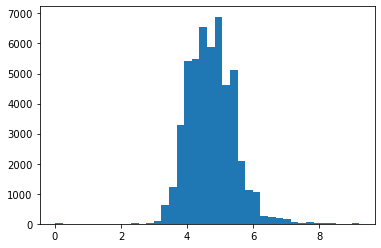

In [21]:
df['log_price'] = df['price'].apply(lambda x: np.log(x+1))
plt.hist(df['log_price'], bins=40)
plt.show()

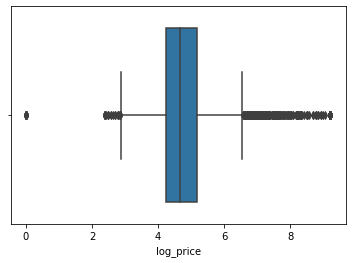

In [22]:
sns.boxplot(df['log_price'])
plt.show()

Based on the histogram and boxplot, log_price seems to be normalized so the model I am going to do will predict **log_price**

It still contains outliers, but I have decided to keep them for now since there are algorithms that are robust to them.

### Columns filtering 2

I have got rid of the columns based on number of nulls and variety of their values. 

Based on the first listing I also saw some columns that I can remove because of the irrelevant information they provide.

This includes all columns containing URL addresses.

In [23]:
url_columns = [col for col in df.columns if 'url' in col]
url_columns

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [24]:
columns_to_remove.extend(url_columns)

In [25]:
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

There are still some columns unneeded:
+ **last_scraped**, **calendar_last_scraped**   : information associated with a web-scraping process
+ **summary**, **space**, **description**, **neighborhood_overview**, **interaction**,
  **name**, **access**, **house_rules**, **notes**, **transit** : columns consisting of descriptions of the apartment/room, general rules, transportation etc. - none of which consisting of relevant information that might help in indicating listing's price
+ **calendar_updated** : information when the calendar displayed on a listing's site was updated by a host, irrelevant as well

I have added these columns to my list of columns to remove.

While choosing columns to remove, I have decided not to include irrelevant columns containing direct information about hosts as I was going to investigate this group of columns in next steps separately.



In [26]:
unuseful_columns = ['last_scraped', 'summary', 'space', 'description', 'neighborhood_overview', 'interaction',
                    'name', 'access', 'house_rules', 'notes', 'transit', 'calendar_last_scraped','calendar_updated']


In [27]:
columns_to_remove.extend(unuseful_columns)
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated']

### Neighbourhood columns

Next, I looked at columns describing location of the listing: **neighbourhood**, **neighbourhood_cleansed**, **neighbourhood_group_cleansed**

In [28]:
df[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']]

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,Midtown,Midtown,Manhattan
1,Brooklyn,Clinton Hill,Brooklyn
2,Manhattan,Murray Hill,Manhattan
3,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn
4,Manhattan,Hell's Kitchen,Manhattan
...,...,...,...
50594,Fordham,Fordham,Bronx
50595,Queens,Ditmars Steinway,Queens
50596,Fordham,Fordham,Bronx
50597,Brooklyn,Bedford-Stuyvesant,Brooklyn


At first sight, it seemed like **neighbourhood_cleansed** and **neighbourhood_group_cleansed** column contains different information from each other (the second one about belonging to one of 5 NYC big boroughs and the first one about the district within that borough) while **neighbourhood** column has the same value as 1 out of 2 other neighbourhood columns.

In order to check whether this is always true, I have filtered the dataset to see number of rows in which:
+ **neighbourhood** cell has the same information as 1 out of 2 cells in *cleansed* columns
+ **neighbourhood** cell contains information different from 2 remaining cells
+ *cleansed* cells are equal

In [29]:
df.query('neighbourhood == neighbourhood_cleansed or neighbourhood == neighbourhood_group_cleansed')[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']]

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,Midtown,Midtown,Manhattan
1,Brooklyn,Clinton Hill,Brooklyn
2,Manhattan,Murray Hill,Manhattan
3,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn
4,Manhattan,Hell's Kitchen,Manhattan
...,...,...,...
50594,Fordham,Fordham,Bronx
50595,Queens,Ditmars Steinway,Queens
50596,Fordham,Fordham,Bronx
50597,Brooklyn,Bedford-Stuyvesant,Brooklyn


In [30]:
df.query('neighbourhood != neighbourhood_cleansed and neighbourhood != neighbourhood_group_cleansed')[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']]

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
6,Lower East Side,Chinatown,Manhattan
8,Park Slope,South Slope,Brooklyn
14,Harlem,East Harlem,Manhattan
26,Williamsburg,Greenpoint,Brooklyn
27,Hamilton Heights,Harlem,Manhattan
...,...,...,...
50577,Hamilton Heights,Harlem,Manhattan
50579,Midtown,Hell's Kitchen,Manhattan
50582,Midtown,Hell's Kitchen,Manhattan
50590,Hamilton Heights,Harlem,Manhattan


In [31]:
df.query('neighbourhood_cleansed == neighbourhood_group_cleansed')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price


My intuition was correct. 

The **neighbourhood_group_cleansed** column shows the information of belonging  to one of 5 NYC boroughs: Manhattan, Bronx, Brooklyn, Queens or Staten Island.

The **neighbourhood_cleansed** column contains the information about thorough location of a listing within the borough.

The filtering showed that in 44073 out of 50599 cases **neighbourhood** cell is the same as 1 out of 2 other cells. 

In remaining rows **neighbourhood** cell contains information about belonging to the NYC borough district different from **neighbourhood_cleansed** cell but it is probably caused by the fact that district division within NYC big boroughs is not that strict.



Let's see how price distribution looks like in each of NYC big boroughs:

In [32]:
df['neighbourhood_group_cleansed'].value_counts()

Manhattan        22070
Brooklyn         20740
Queens            6196
Bronx             1215
Staten Island      378
Name: neighbourhood_group_cleansed, dtype: int64

Text(0.5, 1.0, 'NYC Borough vs Price')

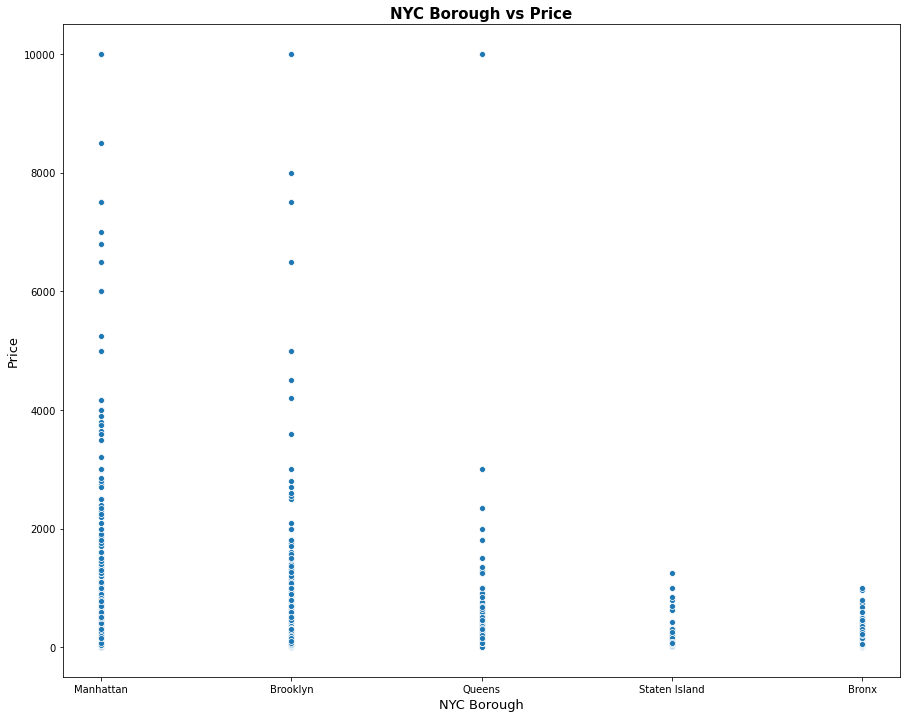

In [33]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='neighbourhood_group_cleansed', y='price', data=df)

plt.xlabel("NYC Borough", size=13)
plt.ylabel("Price", size=13)
plt.title("NYC Borough vs Price",size=15, weight='bold')

This chart implies that the cheapest apartments/rooms are located in Bronx while the most expensive places to stay we can find in Manhattan. However, it also shows that most of the listings in the train dataset are priced lower or equal to 4000.

Since there is a significant price difference between Manhattan and other boroughs and nearly half of the listings in the dataset is from Manhattan I have decided to make a new feature **is_Manhattan** to my dataset based on **neighbourhood_group_cleansed** column. 
To create a new column, I made an *IsPhraseCreator* transformer which takes given column and phrase, creates a new column and fills each cell with '1' if cell from given column is the same as the phrase or 0 if it is not. 

In [34]:
isc = IsPhraseCreator(column='neighbourhood_group_cleansed', phrase='Manhattan')
df_copy = df.copy()
isc.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,is_Manhattan
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,strict_14_with_grace_period,t,t,1,1,0,0,0.39,5.420535,1
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,moderate,f,f,1,1,0,0,4.67,4.499810,0
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,moderate,t,t,1,1,0,0,0.60,5.303305,1
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,strict_14_with_grace_period,f,f,1,0,1,0,0.38,4.110874,0
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,strict_14_with_grace_period,f,f,1,0,1,0,3.52,4.382027,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,flexible,f,f,2,2,0,0,NaN,5.303305,0
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,moderate,f,f,1,1,0,0,NaN,5.017280,0
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,flexible,f,f,2,2,0,0,NaN,5.420535,0
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,flexible,f,f,3,0,3,0,NaN,4.262680,0


In [35]:
df_copy['is_Manhattan'].value_counts()

0    28529
1    22070
Name: is_Manhattan, dtype: int64

It seemed to be working properly. I had 22070 listings located in Manhattan and therefore, the same number of listings had '1' value assigned to the new column.

I could get rid of neighbourhood columns.

In [36]:

columns_to_remove.extend(['neighbourhood', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed'])

### Location columns

After investigating neighbourhood columns, I chose to see what other location columns contain and they were all irrelevant. **City**, **street** and **smart_location** consist of location details written by hosts, with lots of typos and inconsistency. **State** column is virtually one-valued column, **zipcode** is unnecessary since I have geocoordinates (**latitude**, **longitude**) columns in the dataset. Lastly, **is_location_exact** is a binary feature which is highly unbalanced. 

I have extended my list of columns to remove with all columns below:

In [37]:
columns_to_check = ['city', 'state', 'zipcode', 'street', 'smart_location', 'is_location_exact']

for c in columns_to_check:
    print(df[c].value_counts())
    print('\n')

New York                    22341
Brooklyn                    19530
Queens                       4793
Bronx                         739
Brooklyn                      732
                            ...  
Sunnyside, Queens               1
NUEVA YORK                      1
Jackson Heights, Queens         1
WOODSIDE                        1
Kips Bay                        1
Name: city, Length: 321, dtype: int64


NY          50579
Ny              9
ny              2
MP              1
CA              1
NJ              1
New York        1
Name: state, dtype: int64


11211         2206
11221         1962
11206         1538
11216         1446
10019         1296
              ... 
11385-2308       1
NY 10010         1
07093            1
11243            1
11103-3233       1
Name: zipcode, Length: 220, dtype: int64


New York, NY, United States            22340
Brooklyn, NY, United States            19529
Queens, NY, United States               4793
Bronx, NY, United States                 739


In [38]:
columns_to_remove.extend(columns_to_check)
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'street',
 'smart_location',
 'is_location_exact']

### Host columns

The dataset contains a set of columns which concerns hosts directly. I have decided to investigate them separately as the whole dataset is about listings while this group of columns contains information specifically about hosts.

In [39]:
host_columns = [col for col in df.columns if 'host' in col and not col in columns_to_remove]
host_columns

['host_id',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

In [40]:
df[host_columns].head(20)

,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,85%,f,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,1,1,0,0
1,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,100%,f,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,1,1,0,0
2,7322,Chris,2009-02-02,"New York, New York, United States","I'm an artist, writer, traveler, and a native ...",NaN,NaN,f,Flatiron District,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,1,1,0,0
3,7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a few hours,100%,f,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,1,0,1,0
4,8967,Shunichi,2009-03-03,"New York, New York, United States",I used to work for a financial industry but no...,within a few hours,100%,f,Hell's Kitchen,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,1,0,1,0
5,7490,MaryEllen,2009-02-05,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,f,Upper West Side,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,1,0,1,0
6,7549,Ben,2009-02-07,"New York, New York, United States","I live in NYC, I work in Oklahoma, but origina...",within a few hours,100%,t,Lower East Side,4.0,4.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,4,2,0,2
7,7989,Kate,2009-02-16,"New York, New York, United States",I am an educator and researcher and I've worke...,within a few hours,100%,t,Times Square,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,1,0,1,0
8,9744,Laurie,2009-03-10,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",within a few hours,100%,t,Park Slope,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,3,1,2,0
9,11975,Alina,2009-04-01,"Los Angeles, California, United States",Hey there Airbnb travelers! I've been a host ...,NaN,NaN,t,West Village,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,1,1,0,0


In [41]:
df[host_columns].dtypes

host_id                                           int64
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms     

In [42]:
df[host_columns].isnull().sum().sort_values(ascending=False)

host_about                                      20290
host_response_time                              17658
host_response_rate                              17658
host_neighbourhood                               7011
host_location                                     714
host_name                                         563
host_since                                        563
host_identity_verified                            563
host_has_profile_pic                              563
host_total_listings_count                         563
host_listings_count                               563
host_is_superhost                                 563
calculated_host_listings_count_shared_rooms         0
calculated_host_listings_count_private_rooms        0
host_verifications                                  0
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
host_id                                             0
dtype: int64

#### Host verifications vs host identity verified

At first sight, I have noticed **host_verifications** and **host_identity_verified** columns may have something in common as the first one describes ways in which certain host had verified his/her identity while the second one contains information whether host has his identity confirmed or not.

I have decided to keep **host_identity_verified** column for modelling as its values are quite good-balanced. Since it has some empty values I investigated when this situation occurs in terms of value of **host_verifications** column and found a solution to fill empty cells in the **host_identity_verified** column

In [43]:
df['host_identity_verified'].value_counts()

f    27056
t    22980
Name: host_identity_verified, dtype: int64

In [44]:
for u in df['host_verifications'].unique():
    if not u.startswith('['):
        print(u)

None


In [45]:
sorted(list(df['host_verifications'].unique()))

['None',
 "['email', 'facebook', 'google', 'jumio', 'offline_government_id', 'kba', 'selfie', 'government_id', 'identity_manual']",
 "['email', 'facebook', 'reviews', 'jumio', 'government_id']",
 "['email', 'facebook', 'reviews', 'kba']",
 "['email', 'facebook', 'reviews', 'offline_government_id', 'government_id']",
 "['email', 'facebook', 'reviews', 'work_email']",
 "['email', 'facebook']",
 "['email', 'google', 'kba']",
 "['email', 'google', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",
 "['email', 'google', 'reviews', 'jumio', 'government_id']",
 "['email', 'google', 'reviews', 'kba']",
 "['email', 'jumio', 'government_id']",
 "['email', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",
 "['email', 'kba']",
 "['email', 'manual_online', 'reviews', 'manual_offline']",
 "['email', 'offline_government_id', 'government_id']",
 "['email', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",
 "['email', 'phone',

In [46]:
df[df['host_verifications'] =='[]']['host_identity_verified'].value_counts()

f    35
Name: host_identity_verified, dtype: int64

In [47]:
df[df['host_verifications'] =='None']['host_identity_verified'].value_counts()

Series([], Name: host_identity_verified, dtype: int64)

It turned out there are 2 cases when **host_verifications** column contains something else than a standard list of ways of host's identity verification - when it is 'None' or '[ ]'. Moreover, when **host_verifications** is an empty list, **host_identity_verified** is False. That is why I made a few transformers for my future pipeline to handle this issue while preprocessing:
 + *HostVerificationsImputer* which inputs 'None' for every empty cell in the **host_verifications** column 
 + *HostIdentityVerifiedImputer* which fills empty cells in the **host_identity_verified** column with 'f'  
    if **host_verifications** cell contains either '[ ]' or None  or 't' if there is anything else
 + *TrueFalseTransformer* - simple transformer to convert 't'-'f' columns to numerical values 

In [48]:
steps = [
        ('host_verifications_imputer', HostVerificationsImputer()),
        ('host_identity_verified_imputer', HostIdentityVerifiedImputer()),
        ('true_false_transformer', TrueFalseTransformer(columns=['host_identity_verified']))
]

pipe = Pipeline(steps=steps)

df_copy = df.copy()

pipe.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39,5.420535
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,moderate,f,f,1,1,0,0,4.67,4.499810
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,moderate,t,t,1,1,0,0,0.60,5.303305
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38,4.110874
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,strict_14_with_grace_period,f,f,1,0,1,0,3.52,4.382027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,f,flexible,f,f,2,2,0,0,NaN,5.303305
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,f,moderate,f,f,1,1,0,0,NaN,5.017280
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,f,flexible,f,f,2,2,0,0,NaN,5.420535
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,f,flexible,f,f,3,0,3,0,NaN,4.262680


In [49]:
df_copy['host_identity_verified'].value_counts()

0    27619
1    22980
Name: host_identity_verified, dtype: int64

In [50]:
df['host_identity_verified'].value_counts()

f    27056
t    22980
Name: host_identity_verified, dtype: int64

In [51]:
df[host_columns][df['host_identity_verified'].isna()]['host_verifications'].value_counts()

None    563
Name: host_verifications, dtype: int64

I tested all created transformers and it succeded. I had null values in the **host_identity_verified** column for 563 observations in which **host_verifications** cell was 'None'. After the transformation, a number of 'False' values in the **host_identity_verified** column has increased by 563 and the whole column has converted as expected. 

In [52]:
df[host_columns]

,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,85%,f,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,1,1,0,0
1,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,100%,f,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,1,1,0,0
2,7322,Chris,2009-02-02,"New York, New York, United States","I'm an artist, writer, traveler, and a native ...",NaN,NaN,f,Flatiron District,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,1,1,0,0
3,7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a few hours,100%,f,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,1,0,1,0
4,8967,Shunichi,2009-03-03,"New York, New York, United States",I used to work for a financial industry but no...,within a few hours,100%,f,Hell's Kitchen,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,314364722,Archi,2019-12-03,"The Bronx, New York, United States",Straight forward and on time!!,NaN,NaN,f,Fordham,2.0,2.0,"['email', 'phone', 'offline_government_id', 's...",t,f,2,2,0,0
50595,61835657,Hugo,2016-03-06,"Fort Lauderdale, Florida, United States",NaN,NaN,NaN,f,Ditmars / Steinway,0.0,0.0,"['phone', 'facebook']",t,f,1,1,0,0
50596,314364722,Archi,2019-12-03,"The Bronx, New York, United States",Straight forward and on time!!,NaN,NaN,f,Fordham,2.0,2.0,"['email', 'phone', 'offline_government_id', 's...",t,f,2,2,0,0
50597,219544415,Joel And Julian,2018-10-08,US,NaN,within an hour,97%,f,Bedford-Stuyvesant,2.0,2.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,3,0,3,0


#### Host descriptive columns removal 

In the next step I got rid of columns containing irrelevant information, including **host_verifications** which I did not need anymore after inputing missing values in **host_identity_verified** column:

In [53]:
descriptive_columns = ['host_name', 'host_location', 'host_about', 'host_verifications', 'host_neighbourhood']
columns_to_remove.extend(descriptive_columns)
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'street',
 'smart_location',
 'is_location_exact',
 'host_name',
 'host_location',
 'host_about',
 'host_verifications',
 'host_neighbourhood']

#### Calculated host_listings_count columns

Then, I have explored all 4 columns containing 'calculating host_listings_count'. I have checked whether **calculated_host_listings_count** cells is a total number of 3 features: **calculated_host_listings_count_shared_rooms**, **calculated_host_listings_count_private_rooms**, **calculated_host_listings_count_entire_homes**. I have done that with creating a temporary **total** column:

In [54]:
entire_homes = df['calculated_host_listings_count_entire_homes'] 
private_rooms = df['calculated_host_listings_count_private_rooms'] 
shared_rooms = df['calculated_host_listings_count_shared_rooms'] 

df['total'] = entire_homes + private_rooms + shared_rooms    
    

In [55]:
is_equal = df['calculated_host_listings_count'] == df['total']

In [56]:
is_equal.value_counts()

True     49969
False      630
dtype: int64

It turned out only in 630 cases it was not the case. 

That is why I made some calculations which implied that:
+ these 3 categories: 'entire_homes', 'private_rooms', 'shared_rooms' apply to **room_type** column's unique values 
+ **calculated_host_listings_count** is a sum of all listings the host owns, including hotel rooms
+ there is just no separate 'calculated_host_listings' feature for hotel rooms.

In [57]:
df_calculated_listings_count = df[['host_id', 'calculated_host_listings_count', 'total']].copy()

In [58]:
df_calculated_listings_count.drop_duplicates(inplace=True)

In [59]:
df['host_id'].nunique() == len(df_calculated_listings_count)

True

In [60]:
df_calculated_listings_count['total'].sum() - df_calculated_listings_count['calculated_host_listings_count'].sum()

-417

In [61]:
df['room_type'].value_counts()

Entire home/apt    26141
Private room       22785
Shared room         1256
Hotel room           417
Name: room_type, dtype: int64

In [62]:
df.drop(['total'], axis=1, inplace=True)

I decided to keep only **calculated_host_listings_count** feature because I did not need information about number of certain types of properties a host owns in contrary to the total number which may be a useful feature!

According to InsideAirBnb website, which I took this data from, the more listings host owns, the more likely is that he/she rents some properties illegally to avoid paying taxes. If that is the case, it may affect a rental price somehow. If host does not pay enough taxes, he/she can offer a better rental price!

In [63]:
columns_to_remove.extend(['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'])
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'street',
 'smart_location',
 'is_location_exact',
 'host_name',
 'host_location',
 'host_about',
 'host_verifications',
 'host_neighbourhood',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'cal

#### Total listings, listings

There were also 2 features associated with number of listings owned by a host but it turned out these columns were exactly the same and I was not actually sure what information they provided. I checked also on Inside Airbnb website for an extra information about these 2 features. I haven't found anything so I made some calculations to find out more about these columns. Unfortunately, it hasn't showed any useful results so I removed them.

In [64]:
(df['host_total_listings_count'] == df['host_listings_count']).value_counts()

True     50036
False      563
dtype: int64

In [65]:
df[df['host_total_listings_count'] != df['host_listings_count']][host_columns]

,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
38,50124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1,0,1,0
227,303939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5,0,5,0
228,303939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5,0,5,0
230,303939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5,0,5,0
235,303939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49407,18311422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1,1,0,0
49531,425506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1,1,0,0
49922,286125969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1,1,0,0
50121,2314371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1,0,1,0


In [66]:
columns_to_remove.append('host_listings_count')
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'street',
 'smart_location',
 'is_location_exact',
 'host_name',
 'host_location',
 'host_about',
 'host_verifications',
 'host_neighbourhood',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'cal

In [67]:
temp = df[['host_id', 'host_total_listings_count', 'calculated_host_listings_count']].drop_duplicates()

In [68]:
np.abs(temp['host_total_listings_count'].sum() - temp['calculated_host_listings_count'].sum())

15135.0

In [69]:
temp_higher = temp[temp['host_total_listings_count'] > temp['calculated_host_listings_count']]

In [70]:
temp_higher['host_total_listings_count'].sum() - temp_higher['calculated_host_listings_count'].sum()

19953.0

In [71]:
columns_to_remove.append('host_total_listings_count')
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'street',
 'smart_location',
 'is_location_exact',
 'host_name',
 'host_location',
 'host_about',
 'host_verifications',
 'host_neighbourhood',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'cal

#### Host binary variables

Then, I checked binary variables within host features. I have already done it with **host_identity_verified** column but there were 2 "t"-"f" columns left to investigate so I checked proportions of True False values in both columns. However, it turned out these features are not well-balanced. One has nearly 100 % of True values while the other has 4/1 False/True ratio so I removed them both.

In [72]:
for col in ['host_is_superhost', 'host_has_profile_pic']:
    print(df[col].value_counts()/len(df))

f    0.794976
t    0.193897
Name: host_is_superhost, dtype: float64
t    0.986185
f    0.002688
Name: host_has_profile_pic, dtype: float64


In [73]:
columns_to_remove.extend(['host_is_superhost', 'host_has_profile_pic'])
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'street',
 'smart_location',
 'is_location_exact',
 'host_name',
 'host_location',
 'host_about',
 'host_verifications',
 'host_neighbourhood',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'cal

#### New feature - Airbnb Seniority

In this dataset I had a column called **host_since** which contained a date when certain host created his/her account on AirBnb website. I decided to make a new feature out of this column - *Airbnb_Seniority*  which would show how much time a specific host has an account on the Airbnb website as this information may also have impact on the a listing's price.

First of all, I needed to impute missing values in **host_since** column. When I was thinking which values I should input in missing cells of this feature I have noticed that in many listings the higher **host_id**, the newer date **host_since** feature contains. To find out if this is true I produced a scatterplot showing relationship between **host_id** and **host_since** but to create this chart I had to convert data inside **host_since** column to date time first:


In [74]:
df_copy = df.copy()

In [75]:
df_copy['host_since'] = pd.to_datetime(df_copy['host_since'], format='%Y-%m-%d')

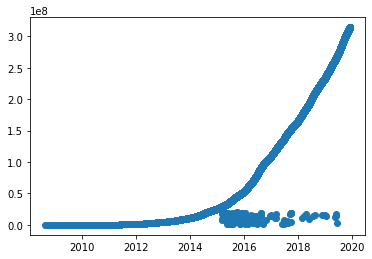

In [76]:
plt.scatter(df_copy['host_since'], df_copy['host_id'])

Well, in most cases my theory about **host_since** and **host_id** relationship was correct except for some noise from hosts who opened their accounts between 2015 and 2019. Since I did not have any better idea for data imputation, I decided to use this relationship to fill all missing cells in **host_since** feature.

First of all, I created a temporary dataset consisting of only 2 features: **host_id** and **host_since**:


In [77]:
df_temp = df[['host_id', 'host_since']].copy()

In [78]:
df_temp.head(20)

,host_id,host_since
0,2845,2008-09-09
1,4869,2008-12-07
2,7322,2009-02-02
3,7356,2009-02-03
4,8967,2009-03-03
5,7490,2009-02-05
6,7549,2009-02-07
7,7989,2009-02-16
8,9744,2009-03-10
9,11975,2009-04-01


In [79]:
df_temp.isnull().sum()

host_id         0
host_since    563
dtype: int64

Then, I sorted it by **host_id** column, reset an index to keep the temporary dataset in a sorted way and filled each missing cell in **host_since** with the value of the closest valid cell within this feature.  

In [80]:
df_temp = df_temp.sort_values(by=['host_id'])

In [81]:
df_temp.head(20)

,host_id,host_since
28293,2438,2008-08-22
2133,2571,2008-08-27
21591,2782,2008-09-07
19130,2782,2008-09-07
12844,2787,2008-09-07
12843,2787,2008-09-07
12742,2787,2008-09-07
13109,2787,2008-09-07
20092,2787,2008-09-07
9730,2787,2008-09-07


In [82]:
df_temp.reset_index(inplace=True)
df_temp

,index,host_id,host_since
0,28293,2438,2008-08-22
1,2133,2571,2008-08-27
2,21591,2782,2008-09-07
3,19130,2782,2008-09-07
4,12844,2787,2008-09-07
...,...,...,...
50594,50577,314323869,2019-12-03
50595,50588,314348098,2019-12-03
50596,50594,314364722,2019-12-03
50597,50596,314364722,2019-12-03


In [83]:
df_temp['host_since'].fillna(method='bfill', inplace=True)

After filling in empty cells, I recovered the temporary dataset to the first version (sorted with index) and replaced the original **host_since** column with the filled one in a *df_copy* and produced the same kind of scatterplot I made before to see results of this transformation.

In [84]:
df_temp = df_temp.sort_values(by='index')
df_temp

,index,host_id,host_since
10,0,2845,2008-09-09
23,1,4869,2008-12-07
29,2,7322,2009-02-02
30,3,7356,2009-02-03
44,4,8967,2009-03-03
...,...,...,...
50596,50594,314364722,2019-12-03
31314,50595,61835657,2016-03-06
50597,50596,314364722,2019-12-03
44128,50597,219544415,2018-10-08


In [85]:
df_temp = df_temp.set_index('index')
df_temp

,host_id,host_since
index,,
0,2845,2008-09-09
1,4869,2008-12-07
2,7322,2009-02-02
3,7356,2009-02-03
4,8967,2009-03-03
...,...,...
50594,314364722,2019-12-03
50595,61835657,2016-03-06
50596,314364722,2019-12-03


In [86]:
df_temp.isnull().sum()

host_id       0
host_since    0
dtype: int64

In [87]:
df_copy['host_since'] = df_temp['host_since']

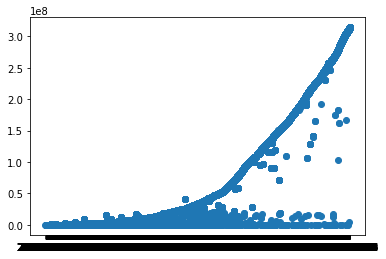

In [88]:
plt.scatter(df_copy['host_since'], df_copy['host_id'])

It did not work perfectly. This operation worked fine for some data while in some areas it caused more noise but it was the best way I have found to solve this issue.

I included operations I performed above into a new transformer - *HostSince Imputer*.

When I have solved the issue with empty values in **host_since** column, I have created *AirbnbSeniorityCreator* which takes a data_compiled_date as an argument, creates a new column 'Airbnb Seniority', fills every cell of the new feature with amount of time between data_compiled_date and **host_since** column and converts it to the number of days.

I have tested both transformers on a copy of the original train dataset to see if it worked. I used the 8th December 2019 date to the *AirbnbSeniorityCreator* as it is the date when this data were web-scrapped from Airbnb website.

In [89]:
steps = [
        ('host_since_imputer', HostSinceImputer()),
        ('airbnb_seniority', AirbnbSeniorityCreator( data_compiled_date = pd.Timestamp(2019, 12, 8) ))
]

pipe = Pipeline(steps=steps)

df_copy = df.copy()

pipe.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,Airbnb_seniority
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,strict_14_with_grace_period,t,t,1,1,0,0,0.39,5.420535,4107
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,moderate,f,f,1,1,0,0,4.67,4.499810,4018
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,moderate,t,t,1,1,0,0,0.60,5.303305,3961
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,strict_14_with_grace_period,f,f,1,0,1,0,0.38,4.110874,3960
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,strict_14_with_grace_period,f,f,1,0,1,0,3.52,4.382027,3932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,flexible,f,f,2,2,0,0,NaN,5.303305,5
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,moderate,f,f,1,1,0,0,NaN,5.017280,1372
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,flexible,f,f,2,2,0,0,NaN,5.420535,5
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,flexible,f,f,3,0,3,0,NaN,4.262680,426


In [90]:
df_copy[['host_since', 'Airbnb_seniority']].head(10)

,host_since,Airbnb_seniority
0,2008-09-09,4107
1,2008-12-07,4018
2,2009-02-02,3961
3,2009-02-03,3960
4,2009-03-03,3932
5,2009-02-05,3958
6,2009-02-07,3956
7,2009-02-16,3947
8,2009-03-10,3925
9,2009-04-01,3903


In [91]:
df_copy[['host_since', 'Airbnb_seniority']].isnull().sum()

host_since          0
Airbnb_seniority    0
dtype: int64

The test was performed correctly.

#### Host_response_time

I had 2 more host columns left to explore, one of which was **host_response_time** feature.

It is an automatically generated feature on the Airbnb site which gives potential guests information how fast certain hosts replies to rental requests.

In [92]:
df['host_response_time'].value_counts()

within an hour        19898
within a few hours     7592
within a day           4533
a few days or more      918
Name: host_response_time, dtype: int64

In [93]:
df['host_response_time'].isnull().sum()

17658

More specifically, this column contains information whether a host responds within an hour, a few hours, a day, or a couple of days. In case of the train dataset this feature has around 1/3 empty values and nearly half of listings where hosts respond within an hour. 

I assumed that if no information about **host_response_time** is provided, it means that probably potential guests did not write to certain hosts much which indicates that the Airbnb site tools could not generate response time for these hosts.

Having thought of that and wanting to make this feature more balanced, I have decided to generate a new feature called **is_host_fast_responder** out of the **host_response_time** column.
In order to achieve that, I have implemented a transformer called *IsHostFastResponderCreator* which creates a new column and fills it with '1' if **host_response_time** is within an hour, few hours or a day or '0' in any other cases including empty value in **host_response_time** column.

I tested this transformer on a new copy of the original dataset just as previous ones and it worked as I expected.


In [94]:
df_copy = df.copy()
ifc = IsHostFastResponderCreator()

ifc.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,is_host_fast_responder
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,strict_14_with_grace_period,t,t,1,1,0,0,0.39,5.420535,1
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,moderate,f,f,1,1,0,0,4.67,4.499810,1
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,moderate,t,t,1,1,0,0,0.60,5.303305,0
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,strict_14_with_grace_period,f,f,1,0,1,0,0.38,4.110874,1
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,strict_14_with_grace_period,f,f,1,0,1,0,3.52,4.382027,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,flexible,f,f,2,2,0,0,NaN,5.303305,0
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,moderate,f,f,1,1,0,0,NaN,5.017280,0
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,flexible,f,f,2,2,0,0,NaN,5.420535,0
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,flexible,f,f,3,0,3,0,NaN,4.262680,1


In [95]:
df_copy['is_host_fast_responder'].value_counts()

1    32023
0    18576
Name: is_host_fast_responder, dtype: int64

#### Host_response_rate

A last column to investigate associated with hosts was **host_response_rate**. It is a measure also generated automatically by Airbnb site. It shows how often a specific hosts responds to messages and rental requests. I thought it would be nice to get some information out from this feature. In order to do that I had to convert the column to numerical values to gather information about data distribution.

I also noticed that all 17658 observations in which **host_response_rate** is empty do not have also any value in **host_response_time** (also 17658 nulls - see cells above) so I used a copy of the dataset to fill up empty values in **host_response_rate** with 0 and convert it to a numerical column to see its distribution.


In [96]:
df[df['host_response_rate'].isna() & df['host_response_time'].isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,moderate,t,t,1,1,0,0,0.60,5.303305
5,5203,https://www.airbnb.com/rooms/5203,20191204162729,2019-12-06,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Stay in my family's little guest room and enj...,"Our best guests are seeking a safe, clean, spa...",none,Our neighborhood is full of restaurants and ca...,...,f,flexible,t,t,1,0,1,0,0.95,4.382027
9,6090,https://www.airbnb.com/rooms/6090,20191204162729,2019-12-06,West Village Nest - Superhost,"Freshly painted, bright open space! Excellent ...",Excellent West Village Location - Bleecker Str...,"Freshly painted, bright open space! Excellent ...",none,The West Village is the most walking friendly ...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.22,4.795791
21,8700,https://www.airbnb.com/rooms/8700,20191204162729,2019-12-05,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,NaN,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,...,f,moderate,f,f,1,0,1,0,NaN,4.394449
38,12937,https://www.airbnb.com/rooms/12937,20191204162729,2019-12-06,"1 Stop fr. Manhattan! Private Suite,Landmark B...","Private room, dedicated bath and a separate en...",Beautifully renovated bedroom suite in 1890 To...,"Private room, dedicated bath and a separate en...",none,Long Island City is the hottest neighborhood i...,...,f,strict_14_with_grace_period,f,f,1,0,1,0,2.33,4.875197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50592,40569773,https://www.airbnb.com/rooms/40569773,20191204162729,2019-12-06,Gorgeous Loft in the heart of Flatiron / Chelsea,Exceptional loft in the heart of Flatiron / Ch...,Experience NYC in style! If you've ever wonder...,Exceptional loft in the heart of Flatiron / Ch...,none,NaN,...,f,flexible,f,f,1,1,0,0,NaN,5.707110
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,f,flexible,f,f,2,2,0,0,NaN,5.303305
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,f,moderate,f,f,1,1,0,0,NaN,5.017280
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,f,flexible,f,f,2,2,0,0,NaN,5.420535


In [97]:

df_copy['host_response_rate'] = df_copy['host_response_rate'].fillna(0)
df_copy['host_response_rate'] = df_copy['host_response_rate'].astype('str')
df_copy['host_response_rate'] = df_copy['host_response_rate'].apply(lambda x: x.replace('%', ''))
df_copy['host_response_rate'] = df_copy['host_response_rate'].astype('int')


In [98]:
df_copy['host_response_rate'].unique()

array([ 85, 100,   0,  90,  60,  92,  56,  83,  89,  97,  75,  84,  91,
        50,  88,  70,  80,  40,  81,  76,  95,  96,  30,  86,  65,  38,
        79,  63,  67,  33,  87,  11,  55,  78,  98,  72,  94,  25,  71,
        10,  93,  44,  69,  13,  43,  64,  82,  73,  42,  77,  57,  20,
        54,  28,  61,  58,  53,  74,  99,  22,  62,  37,  14,  29,  17,
        12,  46,  31,  18,  47,  27,  36,  41,   9,  49,  26,  66,  68,
        48,  35,  59,  39])

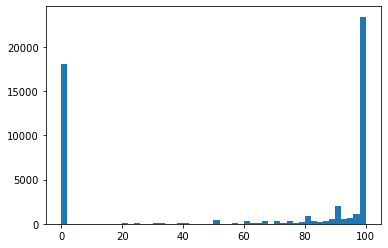

In [99]:
plt.hist(df_copy['host_response_rate'], bins=50)
plt.show()

In [100]:
df_copy['host_response_rate'].describe()

count    50599.000000
mean        60.734758
std         46.398134
min          0.000000
25%          0.000000
50%         93.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64

In [101]:
df_copy['host_response_rate'][df_copy['host_response_rate'] == 100]

1        100
3        100
4        100
6        100
7        100
        ... 
50574    100
50575    100
50579    100
50582    100
50591    100
Name: host_response_rate, Length: 22318, dtype: int64

Histogram and information above about the **host_response_rate** column indicated that nearly half of the listings are owned by hosts who always respond so I decided to create a new column called **host_always_responds** which is '1-0' column with '1' if **host_response_rate** is equal to 100 or '0' if not. 
To achieve that I have created a new transformer called *HostAlwaysRespondsCreator* which creates the new column based on conditions I wrote above.

As always, I tested this transformer to see if it worked:

In [102]:
df_copy = df.copy()

harc = HostAlwaysRespondsCreator()
harc.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,host_always_responds
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,strict_14_with_grace_period,t,t,1,1,0,0,0.39,5.420535,0
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,moderate,f,f,1,1,0,0,4.67,4.499810,1
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,moderate,t,t,1,1,0,0,0.60,5.303305,0
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,strict_14_with_grace_period,f,f,1,0,1,0,0.38,4.110874,1
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,strict_14_with_grace_period,f,f,1,0,1,0,3.52,4.382027,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,flexible,f,f,2,2,0,0,NaN,5.303305,0
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,moderate,f,f,1,1,0,0,NaN,5.017280,0
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,flexible,f,f,2,2,0,0,NaN,5.420535,0
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,flexible,f,f,3,0,3,0,NaN,4.262680,0


In [103]:
df_copy['host_always_responds'].value_counts()

0    28281
1    22318
Name: host_always_responds, dtype: int64

I added 3 columns (**host_since**, **host_response_time**, **host_response_rate**) that I would not need in an original form to *columns_to_remove* list and carried on with investigation of group of 'night columns'

In [104]:
columns_to_remove.extend(['host_since', 'host_response_time', 'host_response_rate'])
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'street',
 'smart_location',
 'is_location_exact',
 'host_name',
 'host_location',
 'host_about',
 'host_verifications',
 'host_neighbourhood',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'cal

#### Night columns

When I loaded the data for the first time, I have seen these strange names 'minimum_maximum_nights' etc. When I extracted night columns I suspected that there were going to be lots of data duplications so I definied queries which would help me to confirm if my theory was correct:

In [105]:
night_columns = [col for col in df.columns if 'night' in col]
night_columns

['minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm']

In [106]:
df[night_columns]

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,10,1125,10,10,1125,1125,10.0,1125.0
1,1,730,1,1,730,730,1.0,730.0
2,3,21,3,3,21,21,3.0,21.0
3,29,730,29,29,730,730,29.0,730.0
4,2,14,1,2,14,14,1.8,14.0
...,...,...,...,...,...,...,...,...
50594,1,28,1,1,28,28,1.0,28.0
50595,3,14,3,3,1125,1125,3.0,1125.0
50596,1,29,1,1,29,29,1.0,29.0
50597,2,1125,2,2,1125,1125,2.0,1125.0


First of all, I took columns describing 'minimum nights' into consideration, that is **minimum_nights**, **minimum_minimum_nights**, **maximum_minimum_nights** features.

I filtered the dataset in such a way that it would show me a part of the train set with all these 3 columns being equal and the second part where at least 1 out of these columns has a different value:

In [107]:
df[night_columns].query('minimum_nights == minimum_minimum_nights and minimum_minimum_nights == maximum_minimum_nights and minimum_nights == maximum_minimum_nights')

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,10,1125,10,10,1125,1125,10.0,1125.0
1,1,730,1,1,730,730,1.0,730.0
2,3,21,3,3,21,21,3.0,21.0
3,29,730,29,29,730,730,29.0,730.0
5,2,14,2,2,14,14,2.0,14.0
...,...,...,...,...,...,...,...,...
50594,1,28,1,1,28,28,1.0,28.0
50595,3,14,3,3,1125,1125,3.0,1125.0
50596,1,29,1,1,29,29,1.0,29.0
50597,2,1125,2,2,1125,1125,2.0,1125.0


In [108]:
df[night_columns].query('minimum_nights != minimum_minimum_nights or minimum_minimum_nights != maximum_minimum_nights or minimum_nights != maximum_minimum_nights')

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
4,2,14,1,2,14,14,1.8,14.0
13,3,730,2,3,730,730,3.0,730.0
34,2,75,2,6,75,75,2.2,75.0
45,2,30,2,7,30,30,2.1,30.0
57,30,365,6,30,365,365,29.5,365.0
...,...,...,...,...,...,...,...,...
50523,1,1125,1,5,1125,1125,1.1,1125.0
50528,30,1125,29,30,1125,1125,29.9,1125.0
50531,2,28,1,2,20,28,2.0,28.0
50578,1,1125,1,3,1125,1125,1.3,1125.0


As I expected, in majority of cases (45572!) values within 3 columns describing minimum nights were duplicated.

I performed same operation for maximum nights as well and the results were very similar. In 48532 observations all values within 3 columns were duplicated:

In [109]:
df[night_columns].query('maximum_nights == minimum_maximum_nights and minimum_maximum_nights == maximum_maximum_nights and maximum_nights == maximum_maximum_nights')

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,10,1125,10,10,1125,1125,10.0,1125.0
1,1,730,1,1,730,730,1.0,730.0
2,3,21,3,3,21,21,3.0,21.0
3,29,730,29,29,730,730,29.0,730.0
4,2,14,1,2,14,14,1.8,14.0
...,...,...,...,...,...,...,...,...
50593,5,1125,5,5,1125,1125,5.0,1125.0
50594,1,28,1,1,28,28,1.0,28.0
50596,1,29,1,1,29,29,1.0,29.0
50597,2,1125,2,2,1125,1125,2.0,1125.0


In [110]:
df[night_columns].query('maximum_nights != minimum_maximum_nights or minimum_maximum_nights != maximum_maximum_nights or maximum_nights != maximum_maximum_nights')

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
11,1,30,1,1,1125,1125,1.0,1125.0
30,2,6,2,2,1125,1125,2.0,1125.0
47,30,160,30,30,1125,1125,30.0,1125.0
62,1,1124,1,1,2,1124,1.0,1095.5
145,1,365,1,1,1125,1125,1.0,1125.0
...,...,...,...,...,...,...,...,...
50573,1,30,1,1,1125,1125,1.0,1125.0
50579,2,180,2,2,1125,1125,2.0,1125.0
50582,5,10,5,5,1125,1125,5.0,1125.0
50587,31,31,31,31,1125,1125,31.0,1125.0


I have not got into **minimum_nights_avg_ntm**, **maximum_nights_avg_ntm** which happened to be sort of average of minimum and maximum nights for each listing respectively because I decided to count the average myself using each 3-columned group. To do that, I created another transformer *NightsAvgCreator* which takes 3 night columns either for 'minimum' or 'maximum' nights and counts mean values from the group of columns for every observation. 

I tested it below and added all original night columns to *columns_to_remove* list

In [111]:
df_copy = df.copy()

In [112]:
df_copy['min_nights_avg'] = (df_copy['minimum_nights'] + df_copy['minimum_minimum_nights'] + df_copy['maximum_minimum_nights'])/3

In [113]:
df_copy['max_nights_avg'] = (df_copy['maximum_nights'] + df_copy['minimum_maximum_nights'] + df_copy['maximum_maximum_nights'])/3

In [114]:
columns_to_remove.extend(night_columns)
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'street',
 'smart_location',
 'is_location_exact',
 'host_name',
 'host_location',
 'host_about',
 'host_verifications',
 'host_neighbourhood',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'cal

In [115]:
steps = [
        ('min_nights_cleaner', NightsAvgCreator(option='min')),
        ('max_nights_cleaner', NightsAvgCreator(option='max'))
]

pipe = Pipeline(steps=steps)

df_copy = df.copy()

pipe.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,min_nights_avg,max_nights_avg
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,t,t,1,1,0,0,0.39,5.420535,10.0,1125.0
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,1,1,0,0,4.67,4.499810,1.0,730.0
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,t,t,1,1,0,0,0.60,5.303305,3.0,21.0
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,1,0,1,0,0.38,4.110874,29.0,730.0
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,f,1,0,1,0,3.52,4.382027,1.7,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,f,f,2,2,0,0,NaN,5.303305,1.0,28.0
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,f,f,1,1,0,0,NaN,5.017280,3.0,754.7
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,f,f,2,2,0,0,NaN,5.420535,1.0,29.0
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,f,f,3,0,3,0,NaN,4.262680,2.0,1125.0


In [116]:
[col for col in df_copy.columns if 'night' in col]

['minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'min_nights_avg',
 'max_nights_avg']

#### Review columns

After exploring group of night columns it was a time to investigate all features associated with review. These are the following:

- **number_of_reviews**, **number_of_reviews_ltm** - just as it says, number of reviews of each listing, from all time range 2008-2019 and from December 2019 respectively

- **first_review**, **last_review** - dates when someone posted first and last review for certain listing

- **review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value** - mean guest rates for each listing in specific categories  

In [117]:
review_columns = [col for col in df.columns if 'review' in col]
review_columns

['number_of_reviews',
 'number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [118]:
df[review_columns].head(20)

,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,48,7,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0.39
1,295,75,2014-09-30,2019-11-22,90.0,9.0,9.0,10.0,9.0,10.0,9.0,4.67
2,78,8,2009-04-20,2019-10-13,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0.60
3,49,0,2009-05-28,2017-10-05,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0.38
4,454,47,2009-05-06,2019-11-21,84.0,9.0,7.0,9.0,9.0,10.0,8.0,3.52
5,118,0,2009-09-07,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.95
6,161,9,2009-09-01,2019-07-29,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1.29
7,204,36,2009-03-12,2019-11-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.56
8,175,13,2009-04-23,2019-10-23,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.35
9,27,0,2009-08-23,2018-10-31,97.0,10.0,9.0,9.0,10.0,10.0,9.0,0.22


In [119]:
df[review_columns].isnull().sum()

number_of_reviews                  0
number_of_reviews_ltm              0
first_review                   10220
last_review                    10220
review_scores_rating           11162
review_scores_accuracy         11198
review_scores_cleanliness      11184
review_scores_checkin          11214
review_scores_communication    11195
review_scores_location         11218
review_scores_value            11217
reviews_per_month              10220
dtype: int64

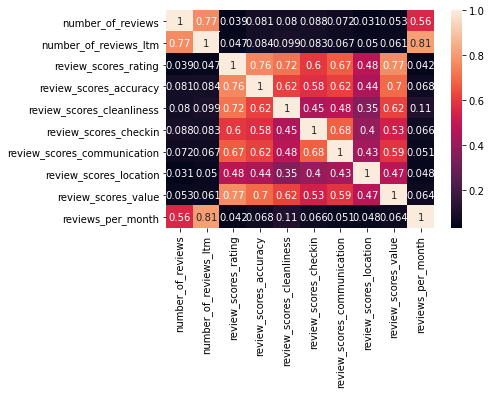

In [120]:
sns.heatmap(df[review_columns].corr(), annot=True)

I had a lot of null values within this group of columns but this is caused mostly by the fact that 10220 listings do not have any review which explains a corresponding number of empty values in **first_review**, **last_review** and **reviews_per_month** columns as well as a majority of the null values in the *review_scores* group of features. 

Nevertheless, based on correlation plot above, I have decided to keep a **number_of_reviews** column as it contains more information than its equivalent feature describing similar data only from 1 month. I have also chosen **review_scores_rating** and **review_scores_location** because there was a quite big correlation between review_scores_columns. I did not need highly correlated variables for my model so I only picked these 2. My choice was driven by the fact that **review_scores_rating** is the most general score, not associated with specific aspect of a listing and **review_scores_location** as it is the only review_scores feature low-correlated with the other ones.

In [121]:
df['review_scores_location'].describe()

count    39381.000000
mean         9.580585
std          0.758823
min          2.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: review_scores_location, dtype: float64

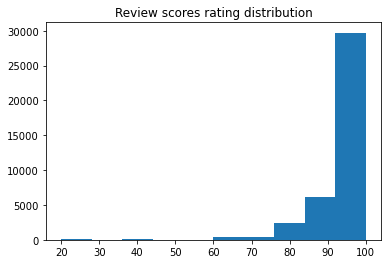

In [122]:
plt.hist(df['review_scores_rating'])
plt.title('Review scores rating distribution')
plt.show()

In [123]:
df[['number_of_reviews', 'number_of_reviews_ltm']]

,number_of_reviews,number_of_reviews_ltm
0,48,7
1,295,75
2,78,8
3,49,0
4,454,47
...,...,...
50594,0,0
50595,0,0
50596,0,0
50597,0,0


As usual, I have extended my *columns_to_remove* list with unnecessary columns.



In [124]:
columns_to_remove.extend ( ['number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_value',
 'reviews_per_month'] )

Since I decided to keep **review_scores_location** and **review_scores_rating** features which had a lot of nulls, I have created 2 transformers to handle this issue: 
+ *ReviewColumnsImputer* which takes these 2 columns and fills empty values with 0 only if **number_of_reviews** is 0 
+ *GroupImputers* - which groups each column by **room_type** and **neighbourhood_group_cleansed**, counts means for every group and fills empty value depending on belonging to specific group; I used it also for other numerical columns in next steps

I tested new transformers just as in previous steps:

In [125]:
df_copy = df.copy()

steps = [
        ('review_columns_imputer', ReviewColumnsImputer()),
        ('group_by_imputer', GroupImputers(columns=['review_scores_location', 'review_scores_rating']))
]

pipe = Pipeline(steps=steps)
pipe.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39,5.420535
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,moderate,f,f,1,1,0,0,4.67,4.499810
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,moderate,t,t,1,1,0,0,0.60,5.303305
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38,4.110874
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,strict_14_with_grace_period,f,f,1,0,1,0,3.52,4.382027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,f,flexible,f,f,2,2,0,0,NaN,5.303305
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,f,moderate,f,f,1,1,0,0,NaN,5.017280
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,f,flexible,f,f,2,2,0,0,NaN,5.420535
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,f,flexible,f,f,3,0,3,0,NaN,4.262680


In [126]:
df_copy[['review_scores_location', 'review_scores_rating']].isnull().sum()

review_scores_location    0
review_scores_rating      0
dtype: int64

The new transformers have surely filled out the empty cells as I did not have null values in these columns anymore. In order to make sure that they fill out empty cells with correct values I have created *df_check* Dataframe which is a copy of a small piece of the original dataset containing all listings with only 5 features : **id, number_of_reviews, room_type, neighbourhood_group_cleansed** and  **review_scores_rating** which I am going to fill in in this test.

To validate my transformers work correctly I performed the following steps:
 + I transformed *df_check* just with *ReviewColumnsImputer* which filled out empty cells in **review_scores_rating** with 0 where possible

In [127]:
rci = ReviewColumnsImputer(columns=['review_scores_rating'])
df_check = df[['id', 'number_of_reviews', 'room_type', 'neighbourhood_group_cleansed', 'review_scores_rating']].copy()
rci.fit_transform(df_check)

,id,number_of_reviews,room_type,neighbourhood_group_cleansed,review_scores_rating
0,2595,48,Entire home/apt,Manhattan,94.0
1,3831,295,Entire home/apt,Brooklyn,90.0
2,5099,78,Entire home/apt,Manhattan,90.0
3,5121,49,Private room,Brooklyn,90.0
4,5178,454,Private room,Manhattan,84.0
...,...,...,...,...,...
50594,40570168,0,Entire home/apt,Bronx,0.0
50595,40570350,0,Entire home/apt,Queens,0.0
50596,40570935,0,Entire home/apt,Bronx,0.0
50597,40572303,0,Private room,Brooklyn,0.0


+ Then, I counted means of **review_scores_rating** column for each group of **room_type** and **neighbourhood_group_cleansed**:

In [128]:
means = round(df_check.groupby(['room_type', 'neighbourhood_group_cleansed'])['review_scores_rating'].mean())
means

room_type        neighbourhood_group_cleansed
Entire home/apt  Bronx                           78.0
                 Brooklyn                        82.0
                 Manhattan                       71.0
                 Queens                          81.0
                 Staten Island                   81.0
Hotel room       Brooklyn                        86.0
                 Manhattan                       55.0
                 Queens                          55.0
Private room     Bronx                           75.0
                 Brooklyn                        74.0
                 Manhattan                       72.0
                 Queens                          76.0
                 Staten Island                   80.0
Shared room      Bronx                           65.0
                 Brooklyn                        62.0
                 Manhattan                       70.0
                 Queens                          65.0
                 Staten Island      

+ Having means counted and *df_check* transformed, I created *df_valid* Dataframe which is a subset of the raw dataframe containing all the listings which are supposed to have **review_scores_rating** cells filled with *GroupImputers* 

In [129]:
df_valid = df[df['review_scores_rating'].isna() & df['number_of_reviews'] != 0][['id', 'number_of_reviews', 'room_type', 'neighbourhood_group_cleansed', 'review_scores_rating']].copy()
df_valid.head(20)


,id,number_of_reviews,room_type,neighbourhood_group_cleansed,review_scores_rating
733,278876,1,Private room,Brooklyn,NaN
887,367042,1,Entire home/apt,Brooklyn,NaN
1089,499249,1,Private room,Brooklyn,NaN
1118,511436,1,Entire home/apt,Brooklyn,NaN
1246,582272,1,Private room,Brooklyn,NaN
1363,652691,1,Entire home/apt,Manhattan,NaN
1367,655472,1,Entire home/apt,Brooklyn,NaN
1408,679633,1,Entire home/apt,Queens,NaN
1489,722464,1,Private room,Brooklyn,NaN
1759,832596,1,Entire home/apt,Manhattan,NaN


+ Next, I took indexes of *df_valid* and printed out *df_copy* (which already went through both transformers: *ReviewColumnsImputer* and  *GroupImputers*) 
.I chose to print out only these rows with indexes matching *df_valid* to see if the *GroupImputers* filled empty cells in **review_scores_rating** correctly.

In [130]:
idxs = list(df_valid.index)


In [131]:
df_copy.loc[idxs, ['id', 'number_of_reviews', 'room_type', 'neighbourhood_group_cleansed', 'review_scores_rating']].head(20)

,id,number_of_reviews,room_type,neighbourhood_group_cleansed,review_scores_rating
733,278876,1,Private room,Brooklyn,74.0
887,367042,1,Entire home/apt,Brooklyn,82.0
1089,499249,1,Private room,Brooklyn,74.0
1118,511436,1,Entire home/apt,Brooklyn,82.0
1246,582272,1,Private room,Brooklyn,74.0
1363,652691,1,Entire home/apt,Manhattan,71.0
1367,655472,1,Entire home/apt,Brooklyn,82.0
1408,679633,1,Entire home/apt,Queens,81.0
1489,722464,1,Private room,Brooklyn,74.0
1759,832596,1,Entire home/apt,Manhattan,71.0


It performed well. 
For instance: **review_scores_rating** cell in row 733 (listing nr 278876) was empty in the original dataset. After using both transformers it was filled with value '74.0' which corresponds to value of *means* Series in the group of 'private room' and 'Brooklyn'!

#### Availability columns

After solving issues concerned with review columns, I went through features describing general booking availability of certain listings in the last 30, 60, 90 or 365 days, that is : **availability_30, availability_60,
       availability_90, availability_365**.  

In [132]:
availabilities = df[['availability_30', 'availability_60',
       'availability_90', 'availability_365']]

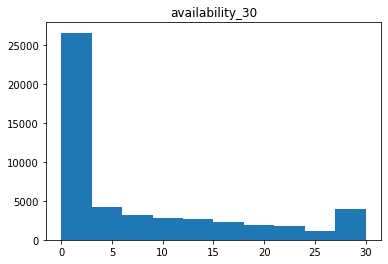

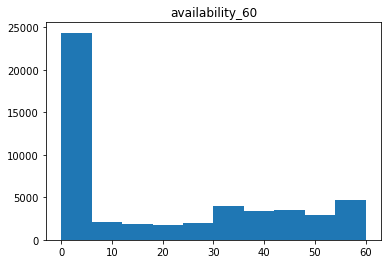

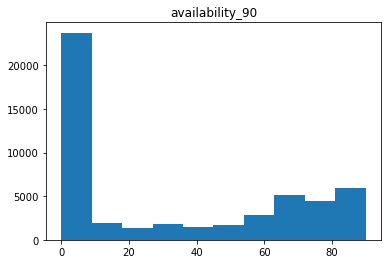

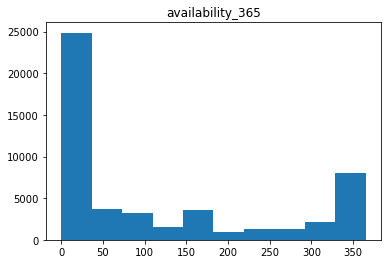

In [133]:
for column in availabilities.columns:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [134]:
availabilities[availabilities['availability_365'] < 36.5].head(20)

,availability_30,availability_60,availability_90,availability_365
0,1,1,1,1
1,1,1,1,1
2,19,19,19,19
5,0,0,0,0
6,1,1,1,1
7,10,10,10,10
8,0,0,0,0
10,0,0,0,0
11,0,0,0,0
12,4,5,26,26


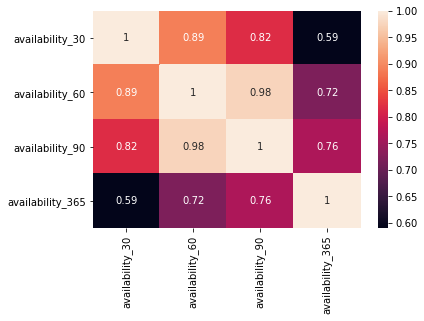

In [135]:
sns.heatmap(availabilities.corr(), annot=True)

Based on histograms, correlation plot and cases when availability is small in general (causing a lot of duplications), I decided to keep only **availability_365** column as it contains information about booking possibility during the greatest period of time.

In [136]:
columns_to_remove.extend( ['availability_30', 'availability_60',
       'availability_90'] ) 

### Rest of the features

I had only 17 columns left to explore, so I displayed what I had to deal with yet, along with data types of these features and information about number of empty cells within each column :

In [137]:
rest_columns = ['market', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification']
df[rest_columns]

,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,New York,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$350.00,$95.00,1,$0.00,f,strict_14_with_grace_period,t,t
1,New York,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$500.00,NaN,1,$0.00,f,moderate,f,f
2,New York,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$300.00,$125.00,2,$100.00,f,moderate,t,t
3,New York,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$450.00,$0.00,1,$30.00,f,strict_14_with_grace_period,f,f
4,New York,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",NaN,$15.00,1,$12.00,f,strict_14_with_grace_period,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,New York,Apartment,Entire home/apt,5,1.0,3.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",NaN,NaN,1,$0.00,f,flexible,f,f
50595,New York,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$0.00,$75.00,1,$0.00,f,moderate,f,f
50596,New York,Apartment,Entire home/apt,5,1.0,3.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Smoking allo...",NaN,NaN,1,$0.00,t,flexible,f,f
50597,New York,House,Private room,3,2.0,1.0,2.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",NaN,NaN,1,$0.00,t,flexible,f,f


In [138]:
df[rest_columns].dtypes

market                               object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
security_deposit                     object
cleaning_fee                         object
guests_included                       int64
extra_people                         object
instant_bookable                     object
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
dtype: object

In [139]:
df[rest_columns].isnull().sum()

market                                103
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              51
bedrooms                               63
beds                                  132
bed_type                                0
amenities                               0
security_deposit                    17470
cleaning_fee                        10491
guests_included                         0
extra_people                            0
instant_bookable                        0
cancellation_policy                     0
require_guest_profile_picture           0
require_guest_phone_verification        0
dtype: int64

#### Converting numerical columns to right format

The first thing I have noticed is that **security_deposit, cleaning_fee, extra_people** are not considered as numerical features because they are in the exact same format as **price** feature, being 'string' values and containing dollar signs and commas separating thousands. To handle this issue, I have made a new transformer *ToNumericalTransforrmer* which applies *remove_nonnumeric_chars* function I had created already on a certain column and changes a column type to numeric.

As always I tested a new transformer and included *GroupImputers* to see if they both worked together.
To validate that it performed succesfully, I chose **security_deposit** as a test column and performed same steps I did with **review_scores_rating** a few sections above.

In [140]:
columns_to_impute = ['security_deposit', 'cleaning_fee', 'extra_people']

steps = [
        ('to_numeric', ToNumericalTransformer(columns=columns_to_impute)),
        ('group_by_imputer', GroupImputers(columns=columns_to_impute))
]

pipe = Pipeline(steps=steps)


df_copy = df.copy()

pipe.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39,5.420535
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,moderate,f,f,1,1,0,0,4.67,4.499810
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,moderate,t,t,1,1,0,0,0.60,5.303305
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38,4.110874
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,strict_14_with_grace_period,f,f,1,0,1,0,3.52,4.382027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,f,flexible,f,f,2,2,0,0,NaN,5.303305
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,f,moderate,f,f,1,1,0,0,NaN,5.017280
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,f,flexible,f,f,2,2,0,0,NaN,5.420535
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,f,flexible,f,f,3,0,3,0,NaN,4.262680


In [141]:
df_check = df[['id','room_type', 'neighbourhood_group_cleansed', 'security_deposit']].copy()

tnt = ToNumericalTransformer(columns=['security_deposit'])
tnt.fit_transform(df_check)

,id,room_type,neighbourhood_group_cleansed,security_deposit
0,2595,Entire home/apt,Manhattan,350.0
1,3831,Entire home/apt,Brooklyn,500.0
2,5099,Entire home/apt,Manhattan,300.0
3,5121,Private room,Brooklyn,450.0
4,5178,Private room,Manhattan,NaN
...,...,...,...,...
50594,40570168,Entire home/apt,Bronx,NaN
50595,40570350,Entire home/apt,Queens,0.0
50596,40570935,Entire home/apt,Bronx,NaN
50597,40572303,Private room,Brooklyn,NaN


In [142]:
df_check['security_deposit'].isnull().sum()

17470

In [143]:
means = round(df_check.groupby(['room_type', 'neighbourhood_group_cleansed'])['security_deposit'].mean())
means

room_type        neighbourhood_group_cleansed
Entire home/apt  Bronx                           307.0
                 Brooklyn                        317.0
                 Manhattan                       430.0
                 Queens                          239.0
                 Staten Island                   210.0
Hotel room       Brooklyn                         75.0
                 Manhattan                       116.0
                 Queens                           44.0
Private room     Bronx                           108.0
                 Brooklyn                        129.0
                 Manhattan                       182.0
                 Queens                          113.0
                 Staten Island                   137.0
Shared room      Bronx                           131.0
                 Brooklyn                         67.0
                 Manhattan                       206.0
                 Queens                          154.0
                 St

In [144]:
df_valid = df_check[df_check['security_deposit'].isna()].copy()
df_valid.head(20)

,id,room_type,neighbourhood_group_cleansed,security_deposit
4,5178,Private room,Manhattan,NaN
5,5203,Private room,Manhattan,NaN
14,7750,Entire home/apt,Manhattan,NaN
23,9657,Entire home/apt,Manhattan,NaN
26,9782,Private room,Brooklyn,NaN
28,10452,Private room,Brooklyn,NaN
31,11708,Entire home/apt,Brooklyn,NaN
32,11943,Private room,Brooklyn,NaN
35,12318,Private room,Manhattan,NaN
36,12343,Entire home/apt,Manhattan,NaN


In [145]:
idxs = list(df_valid.index)

In [146]:
df_copy.loc[idxs, ['id','room_type', 'neighbourhood_group_cleansed', 'security_deposit']].head(20)

,id,room_type,neighbourhood_group_cleansed,security_deposit
4,5178,Private room,Manhattan,182.0
5,5203,Private room,Manhattan,182.0
14,7750,Entire home/apt,Manhattan,430.0
23,9657,Entire home/apt,Manhattan,430.0
26,9782,Private room,Brooklyn,129.0
28,10452,Private room,Brooklyn,129.0
31,11708,Entire home/apt,Brooklyn,317.0
32,11943,Private room,Brooklyn,129.0
35,12318,Private room,Manhattan,182.0
36,12343,Entire home/apt,Manhattan,430.0


The validation went well. Having looked at certain rows, *ToNumericalTransformer* and *GroupImputers* combined together filled proper values in specific cells.

After handling issue with converting columns containing numeric values to right formats and filling in with the right values I chose to explore all non-numeric features of *rest_columns* group: 

In [147]:
df[rest_columns].select_dtypes(include='object')

,market,property_type,room_type,bed_type,amenities,security_deposit,cleaning_fee,extra_people,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,New York,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$350.00,$95.00,$0.00,f,strict_14_with_grace_period,t,t
1,New York,Guest suite,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$500.00,NaN,$0.00,f,moderate,f,f
2,New York,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$300.00,$125.00,$100.00,f,moderate,t,t
3,New York,Apartment,Private room,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$450.00,$0.00,$30.00,f,strict_14_with_grace_period,f,f
4,New York,Apartment,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",NaN,$15.00,$12.00,f,strict_14_with_grace_period,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...
50594,New York,Apartment,Entire home/apt,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",NaN,NaN,$0.00,f,flexible,f,f
50595,New York,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$0.00,$75.00,$0.00,f,moderate,f,f
50596,New York,Apartment,Entire home/apt,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Smoking allo...",NaN,NaN,$0.00,t,flexible,f,f
50597,New York,House,Private room,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",NaN,NaN,$0.00,t,flexible,f,f


#### 't' - 'f' columns

Of course I did not pay attention to **security_deposit, cleaning_fee, extra_people** as they are still considered to be 'object' type in the raw dataset, so I started analyzing non-numerical columns with 't'-'f' columns and their proportion of True False values:

In [148]:
for col in ['instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']:
    print(f'{col}')
    print(f'{df[col].value_counts()/len(df) * 100}\n')

instant_bookable
f    62.019012
t    37.980988
Name: instant_bookable, dtype: float64

require_guest_profile_picture
f    97.982174
t     2.017826
Name: require_guest_profile_picture, dtype: float64

require_guest_phone_verification
f    97.758849
t     2.241151
Name: require_guest_phone_verification, dtype: float64



All of the 3 features did not have an ideal proportion of values, especially **require_guest_profile_picture, require_guest_phone_verification** columns where nearly 100 % of the column had the same value, but I decided to keep **instant_bookable** feature with values balanced 62 % to 37% and get rid of the 2 remaining columns:

In [149]:
columns_to_remove.extend(['require_guest_profile_picture', 'require_guest_phone_verification'])
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'street',
 'smart_location',
 'is_location_exact',
 'host_name',
 'host_location',
 'host_about',
 'host_verifications',
 'host_neighbourhood',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'cal

The **instant_bookable** feature is simply an information whether the listing can be booked right-away.
The only thing I had left to do was to convert this column to numeric data. Since this column is a 't'-'f' feature I used already created *TrueFalseTransformer* to perform it.
Then, I validated it and the test went well:

In [150]:
df_copy = df.copy()
tft = TrueFalseTransformer(columns=['instant_bookable'])
tft.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39,5.420535
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,moderate,f,f,1,1,0,0,4.67,4.499810
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,moderate,t,t,1,1,0,0,0.60,5.303305
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38,4.110874
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,strict_14_with_grace_period,f,f,1,0,1,0,3.52,4.382027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,f,flexible,f,f,2,2,0,0,NaN,5.303305
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,f,moderate,f,f,1,1,0,0,NaN,5.017280
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,f,flexible,f,f,2,2,0,0,NaN,5.420535
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,f,flexible,f,f,3,0,3,0,NaN,4.262680


In [151]:
df_copy['instant_bookable'].value_counts()

0    31381
1    19218
Name: instant_bookable, dtype: int64

In [152]:
df['instant_bookable'].value_counts()

f    31381
t    19218
Name: instant_bookable, dtype: int64

Then, I took 4 first features of *df[rest_columns]* into consideration, that is **market**, **room_type**, **property_type** and **bed_type**. The last 3 are pretty self-explainatory but I had no idea what mysterious column **market** may contain. So to get an overview of what all 4 features are, I printed the information about proportions of unique values in each column:

In [153]:
for col in ['market', 'room_type', 'property_type', 'bed_type']:
    print(df[col].value_counts())
    print('\n')

New York               50468
Other (Domestic)          14
Adirondacks                2
Agra                       1
Paris                      1
Los Angeles                1
Cuba                       1
Kyoto                      1
San Francisco              1
Jamaica South Coast        1
D.C.                       1
Lagos, NG                  1
Atlanta                    1
New Orleans                1
Boston                     1
Name: market, dtype: int64


Entire home/apt    26141
Private room       22785
Shared room         1256
Hotel room           417
Name: room_type, dtype: int64


Apartment                 39781
House                      4174
Townhouse                  1685
Condominium                1632
Loft                       1412
Guest suite                 424
Boutique hotel              365
Serviced apartment          343
Hotel                       244
Other                       102
Guesthouse                   74
Resort                       66
Hostel              

It turned out **market** and **bed_type** features are literally one-valued columns, so I found them irrelevant for later usage. The same happenned with **property_type** column which occurred to be very inconsistent.

I only left **room_type** feature but I thought it may not be so useful in data modelling in that form even after converting this column to categorical one. Seeing the proportion of room categories, I have decided to create a new feature which would contain information whether a listing is the whole apartment or just the room (shared, private or hotel).

To achieve that, I used *IsPhraseCreator* to make a new column **is_Entire home/apt** which contains value 1 if a specific listing is an apartment or 0 if it is a room: 

In [154]:
columns_to_remove.extend(['market', 'property_type', 'bed_type'])

In [155]:
df_copy = df.copy()
isc = IsPhraseCreator(column='room_type', phrase='Entire home/apt')
isc.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,is_Entire home/apt
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,strict_14_with_grace_period,t,t,1,1,0,0,0.39,5.420535,1
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,moderate,f,f,1,1,0,0,4.67,4.499810,1
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,moderate,t,t,1,1,0,0,0.60,5.303305,1
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,strict_14_with_grace_period,f,f,1,0,1,0,0.38,4.110874,0
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,strict_14_with_grace_period,f,f,1,0,1,0,3.52,4.382027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,flexible,f,f,2,2,0,0,NaN,5.303305,1
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,moderate,f,f,1,1,0,0,NaN,5.017280,1
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,flexible,f,f,2,2,0,0,NaN,5.420535,1
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,flexible,f,f,3,0,3,0,NaN,4.262680,0


In [156]:
nulls = df_copy['is_Entire home/apt'].isnull().sum()
print(f'Column has {nulls} nulls ')
df_copy['is_Entire home/apt'].value_counts()


Column has 0 nulls 


1    26141
0    24458
Name: is_Entire home/apt, dtype: int64

In [157]:
columns_to_remove.append('room_type')

#### Cancellation policy

If you book a listing as a guest and want to cancel it for some reason, the Airbnb site enables to do that and offers a few options. While publishing certain apartment/room, a host can choose one of the following cancellation forms applied by Airbnb service:

+ **Flexible** : Free cancellation is available until 14 days before check-in. If the stay is booked less than 14 days before it starts, guests can cancel for free for 48 hours after booking. If it's outside the initial free cancellation windows but up to 24 hours before the reservation starts, customers get the full refund minus the service fee.

+ **Moderate** : Guests can cancel for free until two weeks before check-in. If the reservation is made less than 14 days before the trip, but it's more than five days until the stay begins, guests have a 48-hour cooling-off period to cancel for free. If it's canceled less than five nights in advance, guests forfeit the first night's rate and half the rate for the remaining nights.

+ **Strict** : Guests have a 48-hour window after booking to cancel for free, as long as the stay starts at least 14 days later. Up to seven days before check-in, guests can get a refund that's 50% of the total nightly rate and the cleaning fee, but they forfeit the service charge. If the guest cancels less than seven days before or leaves the stay early, there's no refund for the nights not spent. 

+ **Super Strict 30 Days** : This invite-only policy is available to guests from hosts under special circumstances only. Guests have 30 full days after booking to cancel and get half the nightly rate total back plus the cleaning fee. If guests leave early, there's no refund for nights not spent.

+ **Super Strict 60 Days**: Also only available by invitation, guests under this policy can cancel 60 days before check-in and get half the total nightly rate back. Guests who decide to leave early also are not eligible for a refund for nights not spend there. 

(source: *businessinsider.com*)

In the raw dataset, there is a **cancelation_policy** feature which provides information of which cancellation option is applied to specific listings.
Having looked at the values of the feature, I have decided to combine all 'strict' options into one and transform the column into categorical one, using newly created *CancellationPolicyTransformer*:

In [158]:
df_copy = df.copy()
cpt = CancellationPolicyTransformer()
cpt.fit_transform(df_copy)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,2,t,t,1,1,0,0,0.39,5.420535
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,1,f,f,1,1,0,0,4.67,4.499810
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,1,t,t,1,1,0,0,0.60,5.303305
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,2,f,f,1,0,1,0,0.38,4.110874
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,2,f,f,1,0,1,0,3.52,4.382027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,f,0,f,f,2,2,0,0,NaN,5.303305
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,f,1,f,f,1,1,0,0,NaN,5.017280
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,f,0,f,f,2,2,0,0,NaN,5.420535
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,f,0,f,f,3,0,3,0,NaN,4.262680


In [159]:
print(df_copy['cancellation_policy'].value_counts())
print('\n')
print(df['cancellation_policy'].value_counts())

2    23345
0    15459
1    11795
Name: cancellation_policy, dtype: int64


strict_14_with_grace_period    23166
flexible                       15459
moderate                       11795
super_strict_60                  107
strict                            49
super_strict_30                   23
Name: cancellation_policy, dtype: int64


After implementation and validating the transformer works well, I carried on with exploring numerical columns of *rest_columns* just to see its number of empty values:

In [160]:
rest_num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'security_deposit', 'cleaning_fee', 'extra_people']



In [161]:
df[rest_num_cols].isnull().sum()

accommodates            0
bathrooms              51
bedrooms               63
beds                  132
guests_included         0
security_deposit    17470
cleaning_fee        10491
extra_people            0
dtype: int64

I decided to include all these numerical columns into *GroupImputers* transformation to handle missing values issue.

### Amenities

Now, I had only one feature left to investigate and that is **amenities** column.

At the bottom of each listing presented on Airbnb site, there is a list of certain features, appliances that the listing has got. These lists are contained in **amenities** feature in the dataset.

In order to extract some useful information out of this feature, I decided to transform **amenities** column into a set of 'dummy' variables 'has_{amenity}' which would take 1-0 values depending on if certain listing has specific amenity or not.
To achieve that, I created *new_df* containing only **id** and **amenities** columns first:

In [162]:
new_df = df[['id', 'amenities']].copy()
new_df.head()

,id,amenities
0,2595,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park..."
1,3831,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
2,5099,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
3,5121,"{Wifi,""Air conditioning"",Kitchen,""Pets live on..."
4,5178,"{TV,Wifi,""Air conditioning"",""Paid parking off ..."


In [163]:
new_df['amenities'][0]

'{TV,Wifi,"Air conditioning",Kitchen,"Paid parking off premises","Free street parking",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,"Lock on bedroom door","Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Keypad,"Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets","Ethernet connection","Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed","Long term stays allowed","Cleaning before checkout","Wide entrance for guests","Flat path to guest entrance","Well-lit path to entrance","No stairs or steps to enter"}'

Each **amenities** cell is a string value and it is a list starting and ending with '{}' brackets, containing specific features written either without or with quotes (").  
In order to extract information about specific amenities within each listing, I had to convert every cell to the list of strings. 
I managed to do it with 2 steps:

1) Replacing '{ } brackets with '[ ]' ones in every cell using *replace_brackets* function I created,

2) Using *safe_load* function implemented in *yaml* library so that I managed to transform **amenities** cells to list of strings


In [164]:
new_df['amenities'] = new_df['amenities'].apply(lambda x: replace_brackets(x))
new_df['amenities'][0]

'[TV,Wifi,"Air conditioning",Kitchen,"Paid parking off premises","Free street parking",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,"Lock on bedroom door","Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Keypad,"Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets","Ethernet connection","Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed","Long term stays allowed","Cleaning before checkout","Wide entrance for guests","Flat path to guest entrance","Well-lit path to entrance","No stairs or steps to enter"]'

In [165]:
new_df[['amenities']] = new_df[['amenities']].applymap(yaml.safe_load)
new_df['amenities'][0]

['TV',
 'Wifi',
 'Air conditioning',
 'Kitchen',
 'Paid parking off premises',
 'Free street parking',
 'Heating',
 'Family/kid friendly',
 'Smoke detector',
 'Carbon monoxide detector',
 'Fire extinguisher',
 'Essentials',
 'Lock on bedroom door',
 'Hair dryer',
 'Iron',
 'Laptop friendly workspace',
 'Self check-in',
 'Keypad',
 'Private living room',
 'Bathtub',
 'Hot water',
 'Bed linens',
 'Extra pillows and blankets',
 'Ethernet connection',
 'Coffee maker',
 'Refrigerator',
 'Dishes and silverware',
 'Cooking basics',
 'Oven',
 'Stove',
 'Luggage dropoff allowed',
 'Long term stays allowed',
 'Cleaning before checkout',
 'Wide entrance for guests',
 'Flat path to guest entrance',
 'Well-lit path to entrance',
 'No stairs or steps to enter']

Now that I had **amenities** column in a suitable format, I created a new *amenities* variable which stored **amenities** column as a list of cells so it was a list of lists of strings.

To get all possible unique amenities out from all the listings, I have made a set of all amenities which can be found in all listings:

In [166]:
amenities = new_df['amenities'].tolist()

unique_amenities = set( [el 
                         for lst in amenities 
                             for el in lst] )
unique_amenities

{'24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Breakfast',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling hoist',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Extra space around bed',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower',
 'Fixed grab bars for shower, toilet',
 'Fixed grab

Having *unique_amenities*, I created 'dummy' columns **has {*amenity*}**:

In [167]:
for a in unique_amenities:
    new_df[f'has_{a}'] = new_df.apply(lambda x: 1 if a in x['amenities'] else 0, axis=1)
    
new_df.columns

Index(['id', 'amenities', 'has_Free street parking',
       'has_Extra space around bed', 'has_Heating', 'has_Host greets you',
       'has_Kitchen', 'has_Fireplace guards', 'has_Free parking on premises',
       'has_Stair gates',
       ...
       'has_Family/kid friendly', 'has_No stairs or steps to enter',
       'has_Essentials', 'has_Elevator', 'has_Lock on bedroom door',
       'has_Safety card', 'has_Private bathroom', 'has_Disabled parking spot',
       'has_Other pet(s)', 'has_Hair dryer'],
      dtype='object', length=131)

Having new columns, I counted a proportion between 1 and 0 in each new feature to select only these columns which had an acceptable balance of values. I chose to keep only columns with percentage of 1 value which vary between 33% and 66% and put them to *selected_amenities_columns*:

In [168]:
selected_amenities_columns = []

for col in new_df.columns:
    if col not in ['id', 'amenities']:
        positive_percentage = ( new_df[col].sum()/ len(new_df) ) * 100
        if 66 > positive_percentage > 33:
            print(f'{col}: {positive_percentage}')
            selected_amenities_columns.append(col)

has_Free street parking: 33.091563074369056
has_Laptop friendly workspace: 63.619834384078736
has_Washer: 40.524516294788434
has_Refrigerator: 40.69448012806578
has_Microwave: 33.986837684539225
has_Hot water: 53.49117571493508
has_Dishes and silverware: 37.249748018735545
has_Stove: 34.02043518646614
has_Fire extinguisher: 38.74582501630467
has_Iron: 62.80361271961896
has_First aid kit: 33.99079033182474
has_Dryer: 39.759679045040414
has_Oven: 33.125160576295976
has_Lock on bedroom door: 37.20429257495208


Having *selected_amenities_columns* I was able to extract all amenities I want to take into consideration for data modelling:

In [169]:
selected_amenities = [col.replace('has_', '') for col in selected_amenities_columns]
selected_amenities

['Free street parking',
 'Laptop friendly workspace',
 'Washer',
 'Refrigerator',
 'Microwave',
 'Hot water',
 'Dishes and silverware',
 'Stove',
 'Fire extinguisher',
 'Iron',
 'First aid kit',
 'Dryer',
 'Oven',
 'Lock on bedroom door']

To include **amenities** transformation in the preprocessing_pipeline, I have made *AmenitiesTransformer* in which I hard-coded *selected_amenities* list and implemented an algorithm for **amenities** cells transformation. It included changing **amenities** column to 'list of lists of strings' and creating new **has{*amenity*}** columns only for amenities included in *selected_amenities*. 

I tested the transformer on a copy of the original dataset, just like any other new transformer: 

In [170]:
df_copy = df.copy()

at = AmenitiesTransformer()
at.fit_transform(df_copy)    

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,has_Washer,has_Fire extinguisher,has_Hot water,has_Lock on bedroom door,has_Dryer,has_First aid kit,has_Dishes and silverware,has_Oven,has_Refrigerator,has_Laptop friendly workspace
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,0,1,1,1,0,0,1,1,1,1
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,0,1,1,1,0,0,1,1,1,1
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,0,1,1,0,0,1,1,1,1,1
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,https://www.airbnb.com/rooms/40570168,20191204162729,2019-12-06,"Happy, accommodating,confortable & súper CLEAN!","Modern chick,super CLEAN, súper CONFORTABLE an...","Newly renovated 3bedroom apt, stainless steel ...","Modern chick,super CLEAN, súper CONFORTABLE an...",none,NaN,...,0,1,1,0,0,1,0,0,0,0
50595,40570350,https://www.airbnb.com/rooms/40570350,20191204162729,2019-12-06,Cozy Modern Cottage Apartment,"Our cozy cottage like apartment, is in the hea...",Our apartment is Newly renovated with May mode...,"Our cozy cottage like apartment, is in the hea...",none,Being that we are 15 minutes away from Manhatt...,...,1,0,0,0,0,1,0,0,0,1
50596,40570935,https://www.airbnb.com/rooms/40570935,20191204162729,2019-12-06,"Súper clean, super confortable,súper ACCOMMODA...","Newly renovated 3bedroom apt, fully equipped w...",NaN,"Newly renovated 3bedroom apt, fully equipped w...",none,Walking distance from FORDHAM UNIVERSITY!,...,0,1,1,0,0,1,0,0,0,0
50597,40572303,https://www.airbnb.com/rooms/40572303,20191204162729,2019-12-06,Captivating Room C,about 5 minutes walk to the nostrand/bedford ...,NaN,about 5 minutes walk to the nostrand/bedford ...,none,NaN,...,0,1,0,1,0,1,0,0,0,1


In [171]:
for col in selected_amenities_columns:
    
    positive_percentage = ( df_copy[col].sum()/ len(df_copy) ) * 100
    if 66 > positive_percentage > 33:
        print(f'{col}: {positive_percentage}')

has_Free street parking: 33.091563074369056
has_Laptop friendly workspace: 63.619834384078736
has_Washer: 40.524516294788434
has_Refrigerator: 40.69448012806578
has_Microwave: 33.986837684539225
has_Hot water: 53.49117571493508
has_Dishes and silverware: 37.249748018735545
has_Stove: 34.02043518646614
has_Fire extinguisher: 38.74582501630467
has_Iron: 62.80361271961896
has_First aid kit: 33.99079033182474
has_Dryer: 39.759679045040414
has_Oven: 33.125160576295976
has_Lock on bedroom door: 37.20429257495208


It worked well. Percentages of values in new columns were exactly the same as the 'dummy' columns I have created manually. 

I added **amenities** column to *columns_to_remove* list along with **id** and **host_id**. After removing duplicates from the list I had a complete list of columns I would like to drop before modelling.

In [172]:
columns_to_remove.append('amenities')
columns_to_remove

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready',
 'listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'last_scraped',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'interaction',
 'name',
 'access',
 'house_rules',
 'notes',
 'transit',
 'calendar_last_scraped',
 'calendar_updated',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'street',
 'smart_location',
 'is_location_exact',
 'host_name',
 'host_location',
 'host_about',
 'host_verifications',
 'host_neighbourhood',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'cal

In [173]:
columns_to_remove.extend(['id', 'host_id'])

In [174]:
columns_to_remove = list(set(columns_to_remove))

In [175]:
columns_to_remove

['host_since',
 'country_code',
 'transit',
 'description',
 'minimum_nights_avg_ntm',
 'host_response_time',
 'minimum_minimum_nights',
 'license',
 'experiences_offered',
 'zipcode',
 'market',
 'interaction',
 'host_listings_count',
 'host_neighbourhood',
 'medium_url',
 'xl_picture_url',
 'id',
 'require_guest_profile_picture',
 'property_type',
 'review_scores_value',
 'reviews_per_month',
 'neighbourhood_cleansed',
 'calendar_last_scraped',
 'review_scores_accuracy',
 'room_type',
 'availability_30',
 'last_scraped',
 'review_scores_communication',
 'host_acceptance_rate',
 'host_about',
 'house_rules',
 'number_of_reviews_ltm',
 'has_availability',
 'maximum_minimum_nights',
 'maximum_nights',
 'first_review',
 'picture_url',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'require_guest_phone_verification',
 'host_thumbnail_url',
 'is_business_travel_ready',
 'maximum_maximum_nights',
 'access',
 'minimum_maximum_nights',
 'thum

**Amenities** exploration was the last part of Dataframe to analyze, so now I could construct a full Pipeline consisting of all transformations I performed throughout this notebook. To complete this pipeline, I have introduced 2 new transformers:

+ *DataFrameSelector* - which removes all redundant columns out from the DataFrame

+ *MeanImputer* - extra transformer which imputes column's mean in numerical columns' missing values in case *GroupImputers* fails to do so. The listing with empty cell may have such a combination of **room_type** and **neighbourhood_group_cleansed** not existing in "group means" calculated by *GroupImputers*. For the train dataset, that should not be the case as it contains around 50000 observations. However, when I put a smaller dataset, that case is very likely to happen.  Anyway, this transformer is just the Scikit built-in *SimpleImputer* with 'mean' strategy. However, it returns Dataframe instead of numpy array which *SimpleImputer* returns by default.
When I had all transformers implemented, I built a Pipeline and test it on the whole train dataset to see if it runs without any issues:

In [176]:
data_compiled_date = pd.Timestamp(2019, 12, 8)

steps = [
        ('neighbourhood_transformer', IsPhraseCreator(column='neighbourhood_group_cleansed', phrase='Manhattan')),
        ('host_verifications_imputer', HostVerificationsImputer()),
        ('host_identity_verified_imputer', HostIdentityVerifiedImputer()),
        ('true_false_transformer', TrueFalseTransformer(columns=['host_identity_verified', 'instant_bookable'])),
        ('host_since_imputer', HostSinceImputer()),
        ('airbnb_seniority', AirbnbSeniorityCreator(data_compiled_date)),
        ('is_host_fast_responder', IsHostFastResponderCreator()),
        ('host_always_responds_creator', HostAlwaysRespondsCreator()),
        ('min_nights_cleaner', NightsAvgCreator(option='min')),
        ('max_nights_cleaner', NightsAvgCreator(option='max')),
        ('review_columns_imputer', ReviewColumnsImputer()),
        ('to_numeric', ToNumericalTransformer(columns=['security_deposit', 'cleaning_fee', 'extra_people'])),
        ('cancellation_policy_transformer', CancellationPolicyTransformer()),
        ('room_type_transformer', IsPhraseCreator(column='room_type', phrase='Entire home/apt')),
        ('group_imputers', GroupImputers(columns=['review_scores_location', 'review_scores_rating','bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee'])),
        ('amenities_transformer', AmenitiesTransformer()),
        ('columns_selector', DataFrameSelector(columns_to_remove)),
        ('mean_imputer', MeanImputer())
    
]

pipe = Pipeline(steps=steps)

df_copy = df.copy()

df_transformed = pipe.fit_transform(df_copy)
df_transformed

,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,has_Washer,has_Fire extinguisher,has_Hot water,has_Lock on bedroom door,has_Dryer,has_First aid kit,has_Dishes and silverware,has_Oven,has_Refrigerator,has_Laptop friendly workspace
0,1.0,40.75362,-73.98377,1.0,1.0,0.0,1.0,225.0,350.0,95.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,1.0,40.68514,-73.95976,3.0,1.0,1.0,4.0,89.0,500.0,84.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,40.74767,-73.97500,2.0,1.0,1.0,1.0,200.0,300.0,125.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,0.0,40.68688,-73.95596,2.0,1.0,1.0,1.0,60.0,450.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,40.76489,-73.98493,2.0,1.0,1.0,1.0,79.0,182.0,15.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,0.0,40.86173,-73.89413,5.0,1.0,3.0,3.0,200.0,307.0,74.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50595,0.0,40.77645,-73.90754,4.0,1.0,1.0,2.0,150.0,0.0,75.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50596,0.0,40.86239,-73.89468,5.0,1.0,3.0,0.0,225.0,307.0,74.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50597,0.0,40.69313,-73.95031,3.0,2.0,1.0,2.0,70.0,129.0,35.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [177]:
df_transformed.dtypes

host_identity_verified            float64
latitude                          float64
longitude                         float64
accommodates                      float64
bathrooms                         float64
bedrooms                          float64
beds                              float64
price                             float64
security_deposit                  float64
cleaning_fee                      float64
guests_included                   float64
extra_people                      float64
availability_365                  float64
number_of_reviews                 float64
review_scores_rating              float64
review_scores_location            float64
instant_bookable                  float64
cancellation_policy               float64
calculated_host_listings_count    float64
log_price                         float64
is_Manhattan                      float64
Airbnb_seniority                  float64
is_host_fast_responder            float64
host_always_responds              

In [178]:
df_transformed.isnull().sum()

host_identity_verified            0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
extra_people                      0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_location            0
instant_bookable                  0
cancellation_policy               0
calculated_host_listings_count    0
log_price                         0
is_Manhattan                      0
Airbnb_seniority                  0
is_host_fast_responder            0
host_always_responds              0
min_nights_avg                    0
max_nights_avg                    0
is_Entire home/apt                0
has_Microwave               

The pipeline worked as expected. The train dataset transformed with this pipeline contained all columns I wanted, in a numerical type, with no empty values.

The last thing left to do was to save the pipeline as an external file which is going to be used in next parts of this project. To accomplish that, I used *joblib* library.

In [179]:
dump(pipe, 'preprocessing_pipeline.joblib')

['preprocessing_pipeline.joblib']

All preprocessing job was done, so It was the time to finally start modelling this data.